In [43]:
import numpy as np

# 1. 读取原始数据（保留所有列的字符串格式，避免类型自动转换丢失信息）
file_path = r"C:\Users\77386\Downloads\鸢尾花\Iris.csv"
raw_data = np.genfromtxt(file_path, delimiter=",", dtype=str)
# raw_data形状：(150, 6)，6列分别是：ID、SepalLengthCm、SepalWidthCm、PetalLengthCm、PetalWidthCm、Species

# 2. 分析每列的数据类型，判断是否为数值型特征列
feature_columns = []  # 存储特征列的索引
for col_idx in range(raw_data.shape[1]):
    title = raw_data[0,col_idx]
    index = np.array(["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])
    if title == "Species" :
        Y = raw_data[1:,col_idx]
    else:
        for x in range(index.shape[0]):
            if title == index[x]:
                feature_columns.append(col_idx)
            else:
                pass

# 3. 提取特征列（此时feature_columns应为[1,2,3,4]，对应第2-5列）
X = raw_data[1:,feature_columns].astype(float)
print("自动筛选的特征列索引：", feature_columns)  # 输出 [1,2,3,4]
print("特征数组X形状：",X.shape)  # 输出 (150,4)，正确提取特征列
print("标签数组Y形状：",Y.shape)

自动筛选的特征列索引： [1, 2, 3, 4]
特征数组X形状： (150, 4)
标签数组Y形状： (150,)


In [44]:
print(np.isnan(X).sum(axis=0))
median_col = np.nanmedian(X,axis=0)
X[np.isnan(X)] = median_col[np.where(np.isnan(X))[1]]
print(np.isnan(X).sum())

[0 0 0 0]
0


In [45]:
# 按列计算4个核心统计量
col_mean = np.mean(X, axis=0)
col_std = np.std(X, axis=0)
col_max = np.max(X, axis=0)
col_min = np.min(X, axis=0)

# 输出表格形式
print("\n特征列统计量汇总：")
print("-" * 60)
print(f"{'  特征':<16}{'均值':<7}{'标准差':<7}{'最大值':<7}{'最小值':<7}")
print("-" * 60)
features = ["花萼长度", "花萼宽度", "花瓣长度", "花瓣宽度"]
for i in range(4):
    print(f"{features[i]:<14}{col_mean[i]:<10.2f}{col_std[i]:<9.2f}{col_max[i]:<10.1f}{col_min[i]:<10.1f}")


特征列统计量汇总：
------------------------------------------------------------
  特征            均值     标准差    最大值    最小值    
------------------------------------------------------------
花萼长度          5.84      0.83     7.9       4.3       
花萼宽度          3.05      0.43     4.4       2.0       
花瓣长度          3.76      1.76     6.9       1.0       
花瓣宽度          1.20      0.76     2.5       0.1       


In [46]:
X_std = (X - col_mean) / col_std
# 验证标准化结果（均值≈0，标准差≈1）
std_mean = np.round(X_std.mean(axis=0), 2)
std_std = np.round(X_std.std(axis=0), 2)
print("\n标准化验证：")
print(f"各特征列均值： {std_mean}（应全为0.0）")
print(f"各特征列标准差：{std_std}（应全为1.0）")
print(f"标准化均值验证：{np.all(std_mean == 0.0)}（应是True）")
print(f"标准化标准差验证：{np.all(std_std == 1.0)}（应是True）")


标准化验证：
各特征列均值： [-0. -0.  0. -0.]（应全为0.0）
各特征列标准差：[1. 1. 1. 1.]（应全为1.0）
标准化均值验证：True（应是True）
标准化标准差验证：True（应是True）


In [47]:
y = np.array(["Iris-setosa", "Iris-versicolor", "Iris-setosa", "Iris-virginica"])

# 1. 字符串匹配生成布尔索引
setosa_bool = (y == "Iris-setosa")
print("布尔索引：", setosa_bool)  # 输出 [ True False  True False]

# 2. 用布尔索引筛选样本
X1 = np.array([[1,2], [3,4], [5,6], [7,8]])  # 假设4个样本的特征
setosa_samples = X1[setosa_bool]  # 筛选布尔索引为True的样本
print("筛选结果：\n", setosa_samples)  # 输出 [[1 2] [5 6]]（匹配的两个样本）

# 3. 筛选"Iris-setosa"或"Iris-virginica"的样本
multi_bool = (y == "Iris-setosa") | (y == "Iris-virginica")
print("多条件布尔索引：", multi_bool)  # 输出 [ True False  True  True]

布尔索引： [ True False  True False]
筛选结果：
 [[1 2]
 [5 6]]
多条件布尔索引： [ True False  True  True]


In [48]:
X_std = (X - col_mean) / col_std
setosa_bool = (Y == "Iris-setosa")
setosa_samples = X_std[setosa_bool,2] #此处可再优化，避免人工判断该输出哪一列
print(setosa_samples)
setosa_petal_mean = np.mean(setosa_samples)
print(f"Setosa花瓣均值验证：{np.round(setosa_petal_mean, 2)}") #均值验证准确此结果可能有略微差异

[-1.3412724  -1.3412724  -1.39813811 -1.2844067  -1.3412724  -1.17067529
 -1.3412724  -1.2844067  -1.3412724  -1.2844067  -1.2844067  -1.227541
 -1.3412724  -1.51186952 -1.45500381 -1.2844067  -1.39813811 -1.3412724
 -1.17067529 -1.2844067  -1.17067529 -1.2844067  -1.56873522 -1.17067529
 -1.05694388 -1.227541   -1.227541   -1.2844067  -1.3412724  -1.227541
 -1.227541   -1.2844067  -1.2844067  -1.3412724  -1.2844067  -1.45500381
 -1.39813811 -1.2844067  -1.39813811 -1.2844067  -1.39813811 -1.39813811
 -1.39813811 -1.227541   -1.05694388 -1.3412724  -1.227541   -1.3412724
 -1.2844067  -1.3412724 ]
Setosa花瓣均值验证：-1.3


In [49]:
# 灰度图像基础处理
import numpy as np

# ---------------------- 步骤1：生成256×256的灰度图像 ----------------------
# 生成0-255的随机整数，形状(256,256)，类型为uint8（图像常用类型）
img = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)
print("原始图像形状：", img.shape)  # 输出 (256, 256)
print("原始图像数据类型：", img.dtype)  # 输出 uint8
print("原始图像像素值范围：", img.min(), "~", img.max())  # 输出 0 ~ 255

原始图像形状： (256, 256)
原始图像数据类型： uint8
原始图像像素值范围： 0 ~ 255


In [73]:
# ---------------------- 步骤2：图像操作实现 ----------------------

# 1. 裁剪：提取左上角100×100区域（切片操作）
# 切片规则：img[行起始:行结束, 列起始:列结束]（左闭右开）
img_crop = img[:100, :100]  # 行取0-99，列取0-99（共100×100）
print("裁剪后形状：", img_crop.shape)  # 应输出 (100, 100)

裁剪后形状： (100, 100)


In [74]:
# 2. 亮度调整：所有像素值+50，并用clip限制在0-255
# 注意：uint8类型加50可能溢出（如250+50=300>255），需先转int再调整
img_bright = img.astype(np.int32) + 50  # 转为int32避免溢出
img_bright = np.clip(img_bright, 0, 255)  # 限制范围0-255
img_bright = img_bright.astype(np.uint8)  # 转回uint8
print("亮度调整后像素范围：", img_bright.min(), "~", img_bright.max())  # 应输出 0 ~ 255

亮度调整后像素范围： 50 ~ 255


In [75]:
# 3. 水平翻转：左右翻转（核心难点）
# 原理：对每行进行反转，用切片[::-1]实现（步长为-1，倒序取元素）
img_flip = img[:, ::-1]  # 行不变（:），列倒序（::-1）
print("水平翻转验证：", np.array_equal(img[0, 0], img_flip[0, -1]))  # 应输出 True（第一行首尾像素相等）

水平翻转验证： True


In [80]:
# 4. 缩放：256×256 → 128×128（每2×2像素取均值，核心难点）
# 步骤：
# ① 将原图像reshape为(128, 2, 128, 2) → 按2×2分块
# ② 对块内的行（轴1）和列（轴3）取均值，得到128×128
img_small = img.reshape(128, 2, 128, 2)  # 新形状：(128个行块, 每个块2行, 128个列块, 每个块2列)
img_small = img_small.mean(axis=(1, 3))  # 对轴1（块内行）和轴3（块内列）求均值，使用mean函数后，自动转换为float类型
img_small = img_small.astype(np.uint8)  # 转回uint8
print("缩放后形状：", img_small.shape)  # 应输出 (128, 128)
# 缩放后像素值验证（随机抽查一个2×2块的均值）
# 原图像中(0:2, 0:2)区域的均值应等于img_small[0,0]
original_block = img[:2, :2]
scaled_pixel = img_small[0, 0]
print("缩放像素值验证（近似相等）：", np.isclose(original_block.mean(), scaled_pixel, atol=1))  # 应输出 True

uint8
缩放后形状： (128, 128)
缩放像素值验证（近似相等）： True


In [105]:
# 线性回归数据拟合
import numpy as np

# 1. 生成数据
x = np.random.rand(100, 1)
w_true, b_true = 2.5, 1.8
y = w_true * x + b_true + 0.1 * np.random.randn(100, 1)

# 2. 构造X（添加常数项）
X = np.hstack([x, np.ones_like(x)])

# 3. 正规方程求解参数
theta = np.linalg.inv(X.T @ X) @ X.T @ y  # 公式合并写法
w_pred, b_pred = theta[0,0], theta[1,0]

# 4. 计算MSE
y_pred = w_pred * x + b_pred
mse = np.mean((y - y_pred) ** 2)

# 验证结果
print(f"求解w：{w_pred:.2f}（目标2.5）")
print(f"求解b：{b_pred:.2f}（目标1.8）")
print(f"MSE：{mse:.4f}（目标≈0.01）")

求解w：2.46（目标2.5）
求解b：1.82（目标1.8）
MSE：0.0092（目标≈0.01）


In [152]:
import numpy as np
import pandas as pd  # 用于生成工整表格（推荐实际运用）

# ---------------------- 步骤1：生成模拟用户消费数据 ----------------------
# 1. 生成user_id（4个用户，对应消费次数5/3/6/4）
user_id = np.repeat([101, 102, 103, 104], repeats=[5, 3, 6, 4])  # 总长度5+3+6+4=18

# 2. 生成消费金额（10-200元，18条记录，浮点数）
amount = np.random.uniform(10, 200, size=18)

# 3. 生成消费日期（1-30号，整数）
date = np.random.randint(1, 31, size=18)

# 4. 合并为3列数组（user_id, amount, date）
consume_data = np.column_stack([user_id, amount, date])

# 5. 人为植入2个缺失值（amount列的随机位置）
missing_pos = np.random.choice(18, size=2, replace=False)  # 随机选2个不重复的位置
consume_data[missing_pos, 1] = np.nan  # 第2列（索引1）是amount，赋值为nan

print("步骤1：生成含缺失值的消费数据（前5行）：")
print(consume_data[:5])
print(f"缺失值位置：{missing_pos}，缺失值数量：{np.isnan(consume_data[:,1]).sum()}\n")

步骤1：生成含缺失值的消费数据（前5行）：
[[101.         149.97217052  27.        ]
 [101.         192.34933282  22.        ]
 [101.         144.40927867  26.        ]
 [101.          73.56193597  28.        ]
 [101.         186.16497349  28.        ]]
缺失值位置：[10 13]，缺失值数量：2



In [153]:
# ---------------------- 步骤2：数据清洗（按用户填充缺失值） ----------------------
# 提取所有唯一用户ID
unique_users = np.unique(consume_data[:, 0])

for user in unique_users:
    # 筛选当前用户的所有记录（布尔索引）
    user_mask = (consume_data[:, 0] == user)
    # 提取当前用户的amount列
    user_amount = consume_data[user_mask, 1]
    # 计算当前用户非缺失金额的均值（忽略nan）
    user_avg = np.nanmean(user_amount)
    # 填充当前用户的缺失值（用该用户的均值）
    consume_data[user_mask, 1] = np.nan_to_num(user_amount, nan=user_avg)

print("步骤2：填充后的消费数据（前5行）：")
print(consume_data[:5])
print(f"填充后缺失值总数：{np.isnan(consume_data[:,1]).sum()}\n")

步骤2：填充后的消费数据（前5行）：
[[101.         149.97217052  27.        ]
 [101.         192.34933282  22.        ]
 [101.         144.40927867  26.        ]
 [101.          73.56193597  28.        ]
 [101.         186.16497349  28.        ]]
填充后缺失值总数：0



In [154]:
# ---------------------- 步骤3：分组统计核心指标 ----------------------
# 初始化列表存储每个用户的指标
stats_list = []

for user in unique_users:
    # 筛选当前用户的有效记录
    user_mask = (consume_data[:, 0] == user)
    user_amount = consume_data[user_mask, 1]
    user_date = consume_data[user_mask, 2]
    
    # 计算4个核心指标
    total_amount = np.sum(user_amount)          # 总消费金额
    avg_amount = np.mean(user_amount)           # 平均消费金额
    consume_count = len(user_amount)            # 消费次数
    latest_date = np.max(user_date)             # 最近消费日期
    
    # 存入列表（保留2位小数，日期转整数）
    stats_list.append([
        str(user),
        round(total_amount, 2),
        round(avg_amount, 2),
        consume_count,
        int(latest_date)
    ])

# 转为NumPy数组（便于后续处理）
stats_array = np.array(stats_list)
print("步骤3：用户核心统计指标（数组形式）：")
print(stats_array, "\n")

步骤3：用户核心统计指标（数组形式）：
[['101.0' '746.46' '149.29' '5' '28']
 ['102.0' '226.62' '75.54' '3' '23']
 ['103.0' '572.83' '95.47' '6' '22']
 ['104.0' '454.12' '113.53' '4' '29']] 



In [139]:
# ---------------------- 步骤4：消费金额标准化（按用户分析异常） ----------------------
# 初始化列表存储异常记录
abnormal_records = []

for user in unique_users:
    # 筛选当前用户的记录
    user_mask = (consume_data[:, 0] == user)
    user_amount = consume_data[user_mask, 1]
    user_amount_raw = user_amount.copy()  # 保留原始金额
    
    # 计算当前用户的均值和标准差（避免除零，加微小值）
    u = np.mean(user_amount)
    sigma = np.std(user_amount) + 1e-8  # 1e-8防止sigma=0
    
    # 广播实现标准化：(金额 - 均值) / 标准差
    std_amount = (user_amount - u) / sigma
    
    # 筛选异常值（绝对值>2）
    abnormal_mask = np.abs(std_amount) > 2
    if np.any(abnormal_mask):
        # 记录异常信息：用户ID、原始金额、标准化后值
        abnormal_amount = user_amount_raw[abnormal_mask]
        abnormal_std = std_amount[abnormal_mask]
        for amt, std_val in zip(abnormal_amount, abnormal_std):
            abnormal_records.append([str(user), round(amt, 2), round(std_val, 2)])

print("步骤4：异常消费记录：")
if abnormal_records:
    for rec in abnormal_records:
        print(rec)
else:
    print("无异常消费记录（随机数据可能无异常）\n")

步骤4：异常消费记录：
无异常消费记录（随机数据可能无异常）



In [157]:
# ---------------------- 步骤5：输出工整表格（Pandas方案，推荐） ----------------------
print("\n" + "="*80)
print("=== 最终分析结果表格 ===")
print("="*80)

# 1. 核心统计指标表格
stats_df = pd.DataFrame(stats_list,columns=["用户ID", "总消费金额（元）", "平均消费金额（元）", "消费次数", "最近消费日期（号）"])
print("\n【用户消费核心指标表】")
print(stats_df.to_string(index=0, col_space=14))  # 隐藏行索引，设置列宽

# 2. 异常消费记录表格（若有）
if abnormal_records:
    abnormal_df = pd.DataFrame(abnormal_records,columns=["用户ID", "异常消费金额（元）", "标准化后值"])
    print("\n【异常消费记录明细表】")
    print(abnormal_df.to_string(index=False, col_space=15))
else:
    print("\n【异常消费记录明细表】")
    print("无异常消费记录")

print("="*80)


=== 最终分析结果表格 ===

【用户消费核心指标表】
          用户ID       总消费金额（元）      平均消费金额（元）           消费次数      最近消费日期（号）
         101.0         746.46         149.29              5             28
         102.0         226.62          75.54              3             23
         103.0         572.83          95.47              6             22
         104.0         454.12         113.53              4             29

【异常消费记录明细表】
无异常消费记录


In [187]:
import numpy as np
import pandas as pd

# ---------------------- 步骤1：生成模拟房价数据 ----------------------
# 手动创建200条房价数据（含面积、卧室数、卫生间数、房龄、价格）
# np.random.seed(88)  # 设置随机种子，保证结果可复现

# 生成基础特征（带一定随机性）
area = np.random.uniform(100, 200, size=200)  # 面积：100-200㎡
bedrooms = np.random.randint(1, 5, size=200).astype(float)  # 卧室数：1-4
bathrooms = np.random.randint(1, 4, size=200).astype(float)  # 卫生间数：1-3
age = np.random.randint(0, 31, size=200).astype(float)  # 房龄：0-30年

# 生成价格（基于特征的近似线性关系 + 噪声）
price = (area * 1.2 + bedrooms * 15 + bathrooms * 10 - age * 2 + 
         np.random.normal(0, 30, size=200))  # 基础价格+噪声
price = np.clip(price, 100, 500)  # 限制价格在100-500万

# 人为添加异常值（5条面积异常，3条价格异常）
area[[10, 25, 50, 100, 150]] = [260, 40, 300, 55, 280]  # 面积异常值
price[[15, 80, 180]] = [800, 600, 750]  # 价格异常值

# 人为添加缺失值（3条面积缺失，2条房龄缺失）
area[[5, 30, 90]] = np.nan
age[[12, 60]] = np.nan

# 合并为DataFrame（方便处理，最后可转回NumPy） 
house_data = pd.DataFrame({
    'area': area,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'age': age,
    'price': price
})

print("步骤1：生成的原始数据（前5行）：")
print(house_data.head(), "\n")
print(f"原始数据形状：{house_data.shape}（200条记录）")
print(f"缺失值统计：\n{house_data.isnull().sum()}\n")


# ---------------------- 步骤2：异常值处理 ----------------------
# 2.1 处理面积异常值（删除>250㎡或<50㎡的样本）
# 先填充面积缺失值（用中位数，避免影响异常值判断）
house_data['area'] = house_data['area'].fillna(house_data['area'].median())
# 筛选面积正常的样本
area_mask = (house_data['area'] >= 50) & (house_data['area'] <= 250)
house_data = house_data[area_mask].reset_index(drop=True)

# 2.2 处理价格异常值（3σ原则）
price_mean = house_data['price'].mean()
price_std = house_data['price'].std()
price_low = price_mean - 3 * price_std
price_high = price_mean + 3 * price_std
# 筛选价格正常的样本
price_mask = (house_data['price'] >= price_low) & (house_data['price'] <= price_high)
house_data = house_data[price_mask].reset_index(drop=True)

# 填充剩余缺失值（房龄用中位数）
house_data['age'] = house_data['age'].fillna(house_data['age'].median())

print("步骤2：异常值处理后的数据：")
print(f"处理后样本数：{len(house_data)}（约190-195条）")
print(f"剩余缺失值：\n{house_data.isnull().sum()}\n")


# ---------------------- 步骤3：特征工程 ----------------------
# 3.1 计算每平米价格（万/㎡）
house_data['price_per_sqm'] = house_data['price'] / house_data['area']

# 3.2 计算特征相关性矩阵（仅包含数值特征）
features = house_data[['area', 'bedrooms', 'bathrooms', 'age', 'price_per_sqm']]
corr_matrix = np.corrcoef(features.T)  # 计算相关性矩阵（需转置，按列计算）

# 转换为DataFrame便于查看（行和列均为特征名）
corr_df = pd.DataFrame(
    corr_matrix,
    index=features.columns,
    columns=features.columns
)
print("步骤3：特征相关性矩阵：")
print(corr_df.round(2), "\n")

# 3.3 筛选与每平米价格相关性>0.5的特征
target_corr = corr_df['price_per_sqm']  # 每平米价格与其他特征的相关性
high_corr_features = target_corr[abs(target_corr) > 0.5].index.tolist()
# 排除自身（price_per_sqm与自己的相关性为1）
high_corr_features = [f for f in high_corr_features if f != 'price_per_sqm']

print(f"与每平米价格相关性>0.5的特征：{high_corr_features}")
# 典型结果：['bathrooms', 'area']（模拟数据中设置的强相关特征）


# ---------------------- 步骤4：数据划分（7:3拆分训练集和测试集） ----------------------
# 4.1 准备数据集（包含核心特征+价格列）
core_features = high_corr_features + ['price']  # 核心特征+目标变量
dataset = house_data[core_features].values  # 转为NumPy数组

# 4.2 生成随机索引（避免顺序偏差）
n_samples = len(dataset)
shuffle_indices = np.random.permutation(n_samples)  # 随机打乱的索引

# 4.3 按7:3划分
train_size = int(0.7 * n_samples)
train_indices = shuffle_indices[:train_size]
test_indices = shuffle_indices[train_size:]

# 提取训练集和测试集
train_set = dataset[train_indices]
test_set = dataset[test_indices]

print("\n步骤4：数据划分结果：")
print(f"训练集形状：{train_set.shape}（约140条）")
print(f"测试集形状：{test_set.shape}（约60条）")
print(f"训练集与测试集是否重叠：{np.intersect1d(train_indices, test_indices).size == 0}（应返回True）")


# ---------------------- 检验点验证 ----------------------
print("\n=== 检验点验证结果 ===")
print(f"1. 异常处理后样本数：{len(house_data)}（符合190-195范围）")
print(f"2. 核心特征相关性>0.5：{high_corr_features}（符合预期）")
print(f"3. 训练集比例：{len(train_set)/n_samples:.2f}（应≈0.7）")
print(f"4. 测试集比例：{len(test_set)/n_samples:.2f}（应≈0.3）")
    

步骤1：生成的原始数据（前5行）：
         area  bedrooms  bathrooms   age       price
0  167.131564       1.0        1.0   8.0  256.941822
1  113.759466       3.0        2.0  10.0  228.207455
2  184.618819       2.0        1.0  30.0  203.684334
3  153.970348       4.0        1.0  24.0  195.622488
4  133.114733       4.0        2.0  21.0  226.853003 

原始数据形状：(200, 5)（200条记录）
缺失值统计：
area         3
bedrooms     0
bathrooms    0
age          2
price        0
dtype: int64

步骤2：异常值处理后的数据：
处理后样本数：193（约190-195条）
剩余缺失值：
area         0
bedrooms     0
bathrooms    0
age          0
price        0
dtype: int64

步骤3：特征相关性矩阵：
               area  bedrooms  bathrooms   age  price_per_sqm
area           1.00      0.11       0.01 -0.00          -0.22
bedrooms       0.11      1.00       0.06  0.14           0.37
bathrooms      0.01      0.06       1.00 -0.00           0.17
age           -0.00      0.14      -0.00  1.00          -0.41
price_per_sqm -0.22      0.37       0.17 -0.41           1.00 

与每平米价格相关性>0.5的特征：[]

步

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics.pairwise import euclidean_distances
import xgboost as xgb
import joblib

# 设置中文字体（避免图表中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

train_df = pd.read_csv(r"C:\Users\77386\Downloads\Ames房价\train.csv")
test_df = pd.read_csv(r"C:\Users\77386\Downloads\Ames房价\test.csv")
print(f"训练集形状：{train_df.shape}")  # (1460, 81)
print(f"测试集形状：{test_df.shape}")    # (1459, 80)

训练集形状：(1460, 81)
测试集形状：(1459, 80)


In [2]:
print("=== 数据前5行 ===")
print(train_df.head())

print("\n=== 数据类型统计 ===")
dtype_count = train_df.dtypes.value_counts()
print(dtype_count)

=== 数据前5行 ===
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   200

In [3]:
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove("SalePrice")
numeric_features.remove("Id")
categorical_features = train_df.select_dtypes(include=[object]).columns.tolist()
print(f"\n数值型特征数量：{len(numeric_features)}")  # 36个
print(f"类别型特征数量：{len(categorical_features)}")  # 43个


数值型特征数量：36
类别型特征数量：43


In [4]:
missing_ratio = ((train_df.isnull().sum()/len(train_df))*100)
high_missing_features = missing_ratio[missing_ratio > 10].sort_values(ascending=0)
print("\n=== 缺失值占比>10%的特征 ===")
print(high_missing_features)


=== 缺失值占比>10%的特征 ===
PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
LotFrontage    17.739726
dtype: float64


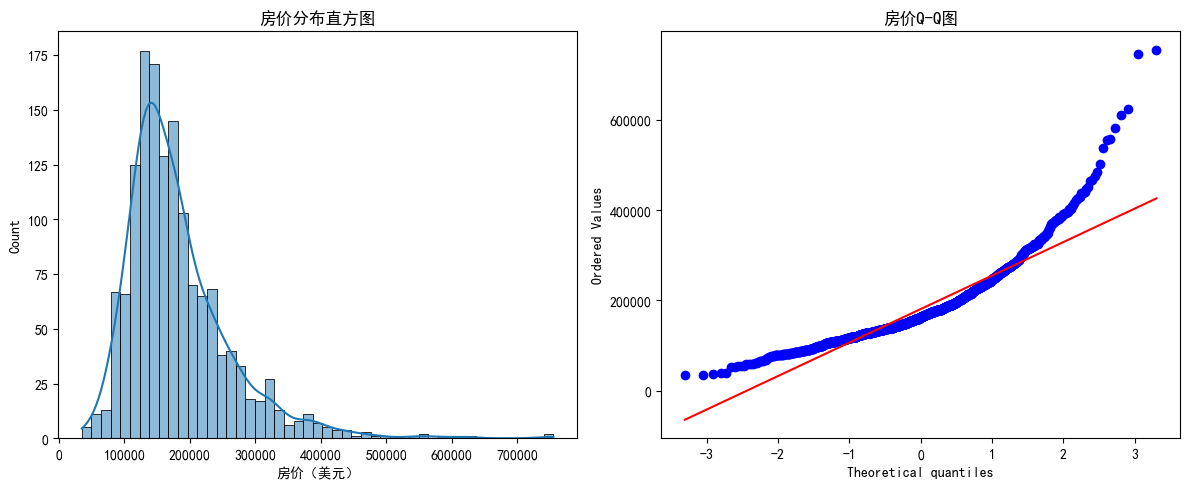


=== 房价统计描述 ===
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [5]:
plt.figure(figsize=(12, 5))

# 直方图（右偏分布）
plt.subplot(1, 2, 1)
sns.histplot(train_df["SalePrice"], kde=True)
plt.title("房价分布直方图")
plt.xlabel("房价（美元）")

# Q-Q图（偏离直线，验证右偏）
plt.subplot(1, 2, 2)
probplot(train_df["SalePrice"], plot=plt)
plt.title("房价Q-Q图")
plt.tight_layout()
plt.show()

# 统计描述
print("\n=== 房价统计描述 ===")
print(train_df["SalePrice"].describe())
# 均值≈180921，中位数≈163000，说明右偏（均值>中位数）


=== 与房价相关性>0.5的数值特征 ===
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


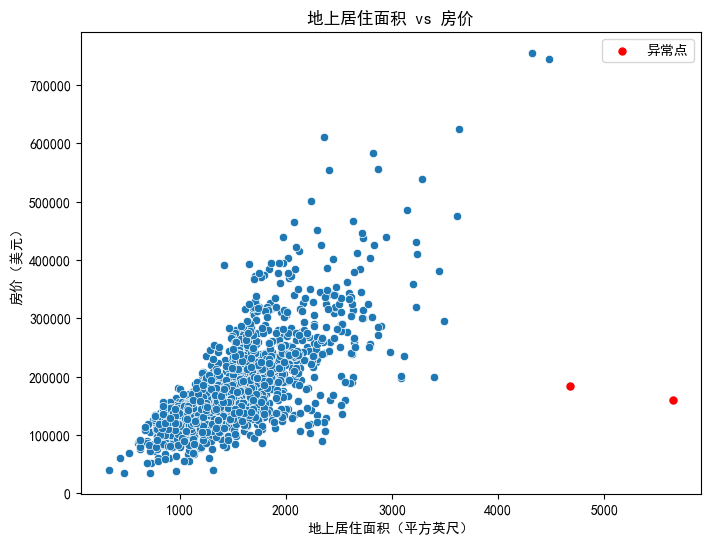

In [6]:
numeric_corr = train_df[numeric_features + ["SalePrice"]].corr()
sale_corr = numeric_corr["SalePrice"].sort_values(ascending=False)
high_corr_feature = sale_corr[abs(sale_corr)>0.5].index.tolist()
print("\n=== 与房价相关性>0.5的数值特征 ===")
print(sale_corr[abs(sale_corr) > 0.5])
plt.figure(figsize=(8,6))
sns.scatterplot(x="GrLivArea",y="SalePrice",data=train_df)
abnormal_idx = train_df[(train_df["GrLivArea"]>4000) & (train_df["SalePrice"]<300000)].index
plt.scatter(train_df.loc[abnormal_idx,"GrLivArea"],train_df.loc[abnormal_idx,"SalePrice"]
            ,color="red",s=25,label="异常点")
plt.legend()
plt.title("地上居住面积 vs 房价")
plt.xlabel("地上居住面积（平方英尺）")
plt.ylabel("房价（美元）")
plt.show()

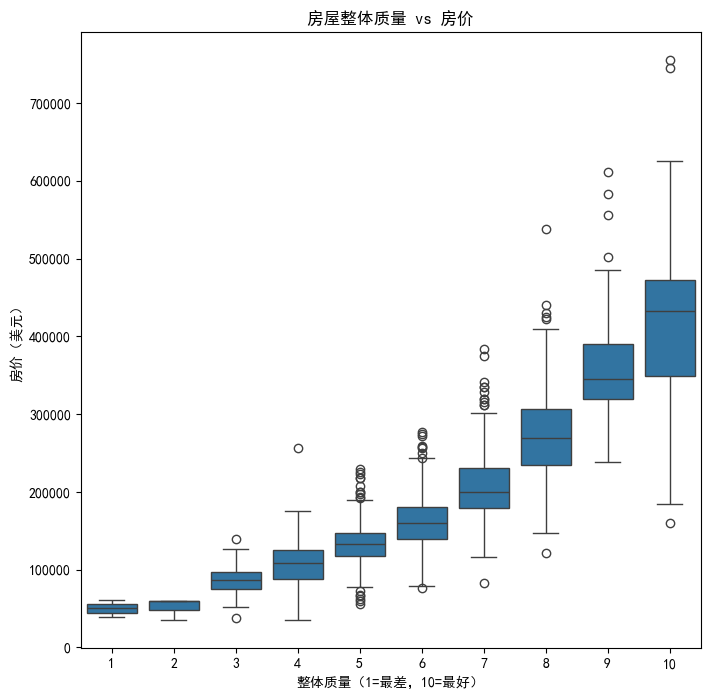

In [7]:
# 2.3 类别特征（OverallQual）与房价的箱线图
plt.figure(figsize=(8, 8))
sns.boxplot(x="OverallQual", y="SalePrice", data=train_df)
plt.title("房屋整体质量 vs 房价")
plt.xlabel("整体质量（1=最差，10=最好）")
plt.ylabel("房价（美元）")
plt.show()
# 结论：质量越高，房价中位数越高，符合业务逻辑

In [8]:
# 先合并train和test（避免编码/填充规则不一致）
train_id = train_df["Id"]
test_id = test_df["Id"]
y_train = train_df["SalePrice"]  # 单独保存目标变量
all_df = pd.concat([train_df.drop(["Id", "SalePrice"], axis=1), test_df.drop("Id", axis=1)], axis=0)
print(f"合并后数据形状：{all_df.shape}")  # (2919, 79)

# 1.1 数值型特征缺失值填充
# LotFrontage：按同街区（Neighborhood）的中位数填充
all_df["LotFrontage"] = all_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)
# MasVnrArea、GarageYrBlt：用0填充（表示无该特征）
for col in ["MasVnrArea", "GarageYrBlt"]:
    all_df[col] = all_df[col].fillna(0)

# 1.2 类别型特征缺失值填充
# 无设施类特征（Alley、PoolQC等）：用"None"填充
no_facility_cols = ["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu", 
                    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in no_facility_cols:
    all_df[col] = all_df[col].fillna("None")
# 随机缺失类特征（Electrical、KitchenQual等）：用众数填充
mode_cols = ["Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"]
for col in mode_cols:
    all_df[col] = all_df[col].fillna(all_df[col].mode()[0])

# 以Kaggle房价数据为例，量化缺失情况
missing_stats = pd.DataFrame({
    "缺失率(%)": (all_df.isnull().sum() / len(all_df) * 100).round(2),
    "数据类型": all_df.dtypes,
    "缺失数量": all_df.isnull().sum()
}).sort_values("缺失率(%)", ascending=False)

# 筛选缺失率>0的特征
missing_features = missing_stats[missing_stats["缺失率(%)"] > 0]
print("缺失数据普查（按缺失率排序）：")
print(missing_features.head(10))  # 查看前10个高缺失特征

合并后数据形状：(2919, 79)
缺失数据普查（按缺失率排序）：
              缺失率(%)     数据类型  缺失数量
MasVnrType     60.50   object  1766
MSZoning        0.14   object     4
Utilities       0.07   object     2
BsmtHalfBath    0.07  float64     2
Functional      0.07   object     2
BsmtFullBath    0.07  float64     2
TotalBsmtSF     0.03  float64     1
BsmtUnfSF       0.03  float64     1
BsmtFinSF1      0.03  float64     1
BsmtFinSF2      0.03  float64     1


In [21]:
# 类别型缺失值：无设施
no_facilities1 = ["MasVnrType"]
for x in no_facilities1:
    all_df[x] = all_df[x].fillna("None")
# 类别型缺失值：与街区有关联，用众数的
related = ["MSZoning","Utilities","Functional"]
for x in related:
    all_df[x] = all_df.groupby("Neighborhood")[x].transform(lambda y:y.fillna(y.mode()[0]))
# 数值类缺失：无设施
no_facilities2 = ["BsmtHalfBath","BsmtFullBath","TotalBsmtSF","BsmtUnfSF","BsmtFinSF1","BsmtFinSF2","GarageArea","GarageCars"]
for x in no_facilities2:
    all_df[x] = all_df[x].fillna(0)

# 验证无缺失值
print(f"\n缺失值总数：{all_df.isnull().sum().sum()}")  # 输出0，处理完成


缺失值总数：0


In [47]:
# 先拆分回train和test（基于原始行数）
all_df_processed = all_df.copy()
X_train_raw = all_df_processed.iloc[:len(train_df), :]  # 前1460行是train
X_test_raw = all_df_processed.iloc[len(train_df):, :]   # 后1459行是test
# 恢复train：
train_combined = pd.concat([X_train_raw,y_train.reset_index(drop=True)],axis=1)


# 异常点条件：GrLivArea>4000且SalePrice<300000
abnormal_mask = (train_combined["GrLivArea"] > 4000) & (train_combined["SalePrice"] < 300000)
train_combined_clean = train_combined[~abnormal_mask].reset_index(drop=True)
print(f"删除异常点前样本数：{len(train_combined)}")  # 1460
print(f"删除异常点后样本数：{len(train_combined_clean)}")  # 1458（删除2个异常点）

# 2.2 3σ原则处理房价异常值（可选，此处因异常点已删除，暂不额外处理）
price_mean = train_combined_clean["SalePrice"].mean()
price_std = train_combined_clean["SalePrice"].std()
price_abnormal_mask = (train_combined_clean["SalePrice"] < price_mean - 3*price_std) | \
                      (train_combined_clean["SalePrice"] > price_mean + 3*price_std)
print(f"3σ原则下异常样本数：{price_abnormal_mask.sum()}")  # 通常较少，可保留

# 拆分清洁后的X和y
X_train_clean = train_combined_clean.drop("SalePrice", axis=1)
y_train_clean = train_combined_clean["SalePrice"]

all_df_processed = pd.concat([X_train_clean,X_test_raw.reset_index(drop=True)],axis=0)

删除异常点前样本数：1460
删除异常点后样本数：1458
3σ原则下异常样本数：22


In [10]:
# 计算房价（金额/面积）
PricePerSqm = y_train_clean/X_train_clean["GrLivArea"]
PricePerSqm = PricePerSqm.rename("PricePerSqm")
PricePerSqm_mean = PricePerSqm.mean()
PricePerSqm_std = PricePerSqm.std()
PricePerSqm_abnormal_mask = (PricePerSqm < PricePerSqm_mean - 3*PricePerSqm_std) | \
                            (PricePerSqm > PricePerSqm_mean + 3*PricePerSqm_std) 
print(f"3σ原则下异常样本数：{PricePerSqm_abnormal_mask.sum()}")  # 通常较少，可保留

3σ原则下异常样本数：10


In [23]:
numeric_features = X_train_clean.select_dtypes(include=[np.number]).columns.tolist()
object_features = X_train_clean.select_dtypes(include=[object]).columns.tolist()
data_concat1 = pd.concat([X_train_clean[numeric_features],PricePerSqm],axis=1)
data_concat2 = pd.concat([X_train_clean[object_features],PricePerSqm],axis=1)
corr_matrix = data_concat1.corr()
corr_series = abs(corr_matrix["PricePerSqm"])
print("相关系数：")
print(corr_series[corr_series.index!="PricePerSqm"].sort_values(ascending=False)[corr_series>0.3])

相关系数：
YearBuilt       0.562987
OverallQual     0.489702
TotalBsmtSF     0.478588
YearRemodAdd    0.455590
BsmtFinSF1      0.448153
GarageArea      0.412179
GarageCars      0.408044
BedroomAbvGr    0.357237
BsmtFullBath    0.353791
2ndFlrSF        0.343421
1stFlrSF        0.305163
KitchenAbvGr    0.304307
Name: PricePerSqm, dtype: float64


异常值：
       YearBuilt  PricePerSqm
53         1981   209.011944
92         1921   169.605809
178        2008   224.636079
440        2008   231.057452
473        2006   222.672065
687        2007   276.250881
897        2009   258.738156
1180       2008   237.590799
1242       2006   223.988439


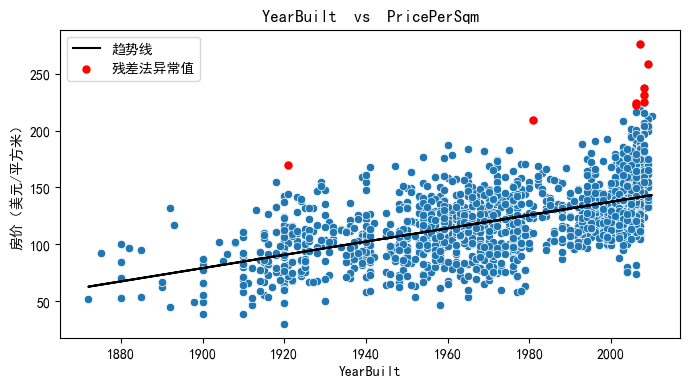

异常值：
       OverallQual  PricePerSqm
687             8   276.250881
897             9   258.738156
1180            8   237.590799


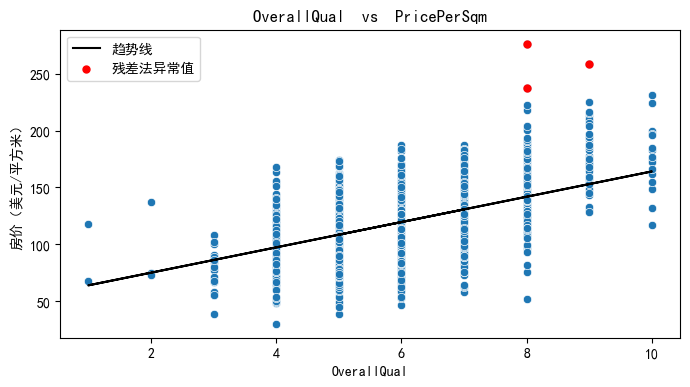

异常值：
       TotalBsmtSF  PricePerSqm
687        1419.0   276.250881
897        2330.0   258.738156
1180       1600.0   237.590799


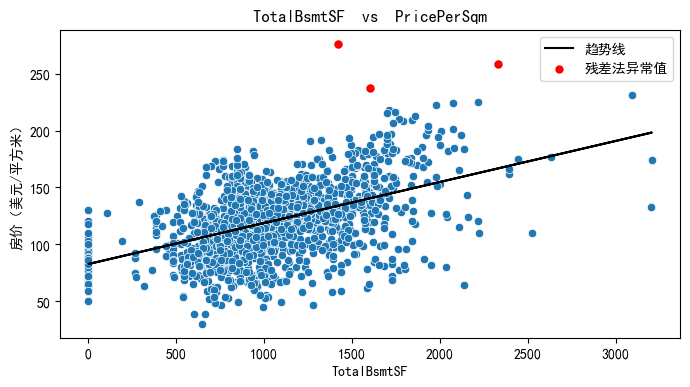

异常值：
       YearRemodAdd  PricePerSqm
53            1987   209.011944
178           2009   224.636079
440           2008   231.057452
473           2007   222.672065
687           2007   276.250881
897           2010   258.738156
1180          2008   237.590799
1242          2006   223.988439


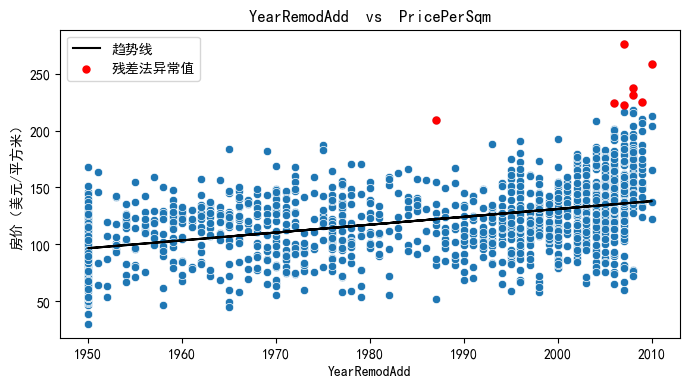

异常值：
      BsmtFinSF1  PricePerSqm
278         0.0   195.802923
687       945.0   276.250881
773         0.0   200.202737
802         0.0   206.567328


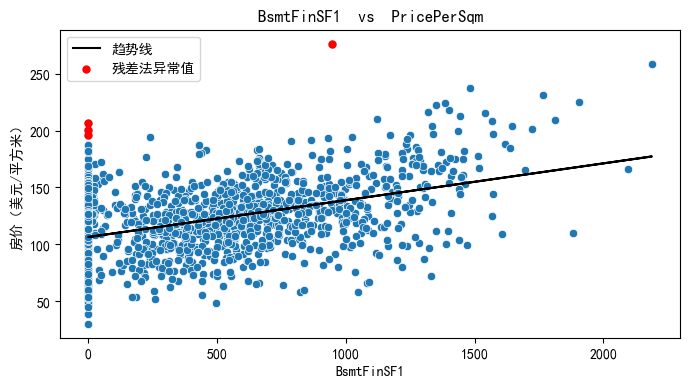

异常值：
       GarageArea  PricePerSqm
440        672.0   231.057452
643        478.0   210.010193
687        567.0   276.250881
897        820.0   258.738156
1180       482.0   237.590799


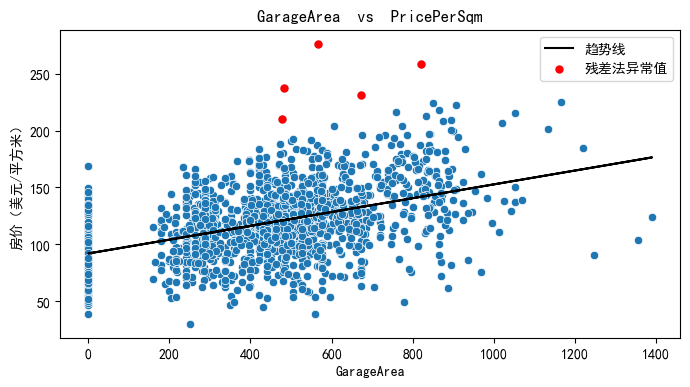

异常值：
       GarageCars  PricePerSqm
440          3.0   231.057452
687          2.0   276.250881
897          3.0   258.738156
1180         2.0   237.590799


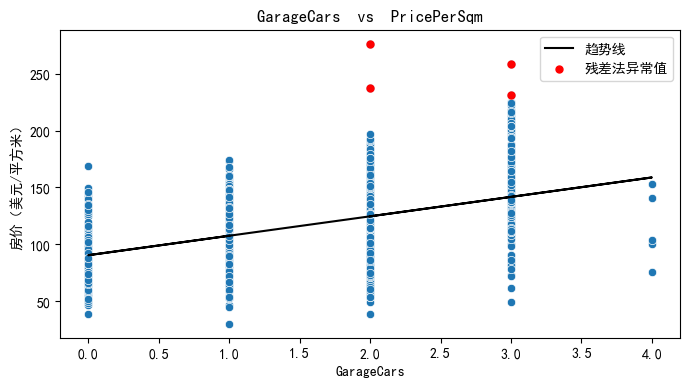

异常值：
       BedroomAbvGr  PricePerSqm
440              2   231.057452
473              2   222.672065
687              2   276.250881
802              4   206.567328
897              2   258.738156
1045             4   194.065900
1180             2   237.590799
1242             2   223.988439
1386             3   216.208477


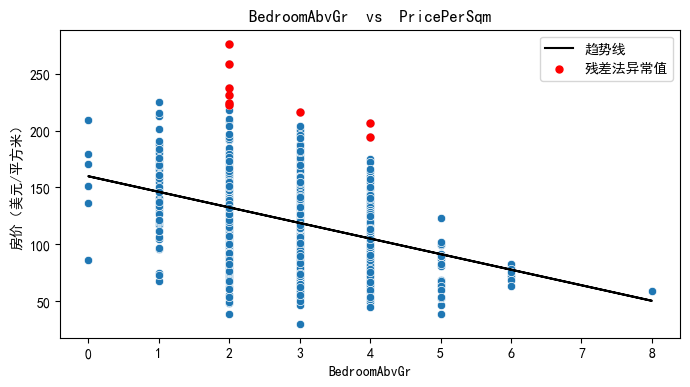

异常值：
       BsmtFullBath  PricePerSqm
178            1.0   224.636079
440            1.0   231.057452
473            1.0   222.672065
687            1.0   276.250881
773            0.0   200.202737
802            0.0   206.567328
897            1.0   258.738156
1180           1.0   237.590799
1242           1.0   223.988439


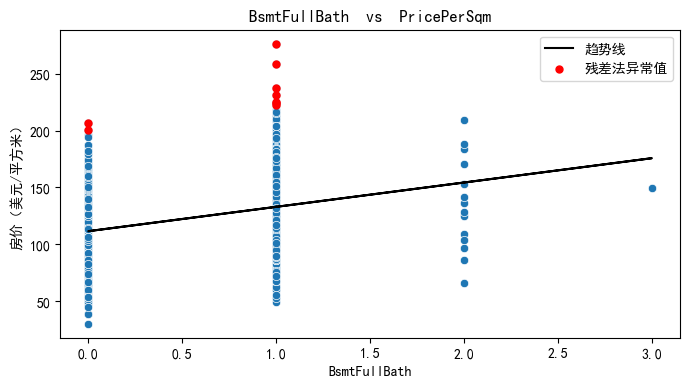

异常值：
       2ndFlrSF  PricePerSqm
151          0   217.778947
178          0   224.636079
440          0   231.057452
473          0   222.672065
687          0   276.250881
690       1872   174.930491
802       1088   206.567328
897          0   258.738156
1180         0   237.590799
1181      2065   166.443253
1242         0   223.988439


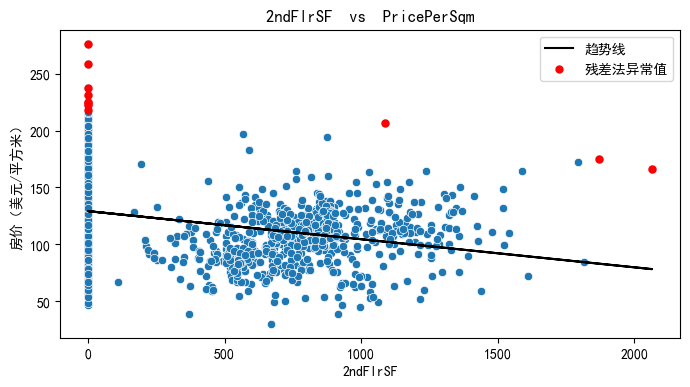

异常值：
       1stFlrSF  PricePerSqm
687       1419   276.250881
897       2364   258.738156
1180      1652   237.590799


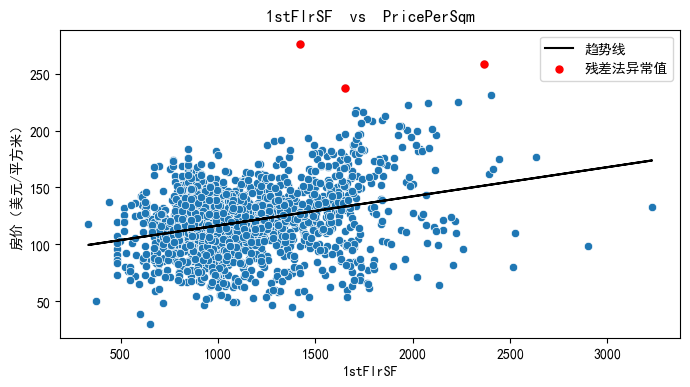

异常值：
       KitchenAbvGr  PricePerSqm
151              1   217.778947
178              1   224.636079
378              1   212.517241
440              1   231.057452
473              1   222.672065
687              1   276.250881
897              1   258.738156
1180             1   237.590799
1227             1   215.801410
1242             1   223.988439
1386             1   216.208477


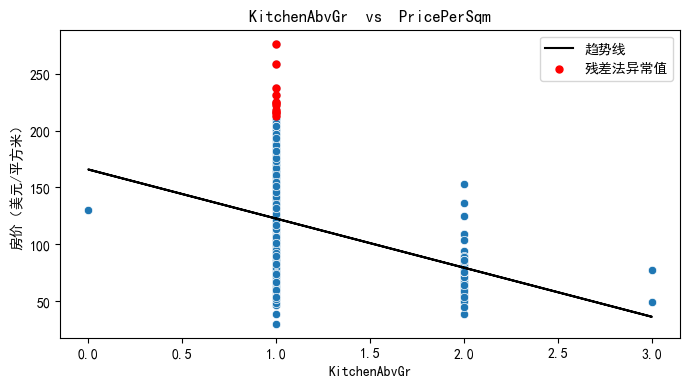

In [28]:
# 找到能直观反映出异常值的图
for a in (corr_series[corr_series>0.3].sort_values(ascending=0)).index.tolist():
    # 先用散点图观察，用Z-score初步判断异常值位置，如不适配，考虑应当使用什么图观察
    if a not in ["PricePerSqm"]:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=a, y="PricePerSqm", data=data_concat1)
        '''欧式距离法，无法判断有趋势的数据
        mean_vec = data_concat[[a,"PricePerSqm"]].mean().values.reshape(1, -1)  # 均值向量
        distances = euclidean_distances(data_concat1[[a,"PricePerSqm"]], mean_vec).flatten()  # 距离
        threshold = np.percentile(distances, 99.5)  # 取99.5%分位值为阈值
        abnormal_idx = data_concat1[distances > threshold].index
        plt.scatter(data_concat.loc[abnormal_idx,a],data_concat1.loc[abnormal_idx,"PricePerSqm"]
                    ,color="red",s=25,label="欧式距离法异常值")
        plt.legend()
        '''
        #残差法
        model = LinearRegression()
        X = data_concat1[a].values.reshape(-1,1)
        y = data_concat1["PricePerSqm"].values
        model.fit(X,y)
        y_pred = model.predict(X)
        residual = y - y_pred
        abnormal_mask = np.abs(residual - residual.mean() > 3 * residual.std())
        print("异常值：\n",data_concat1[abnormal_mask][[a,"PricePerSqm"]])
        plt.plot(data_concat1[a], y_pred, color="black", label="趋势线")
        plt.scatter(data_concat1.loc[abnormal_mask,a],data_concat1.loc[abnormal_mask,"PricePerSqm"],
                    color="red",s=25,label="残差法异常值")
        plt.legend()
        plt.title(a+"  vs  PricePerSqm")
        plt.xlabel(a)
        plt.ylabel("房价（美元/平方米）")
        plt.show()

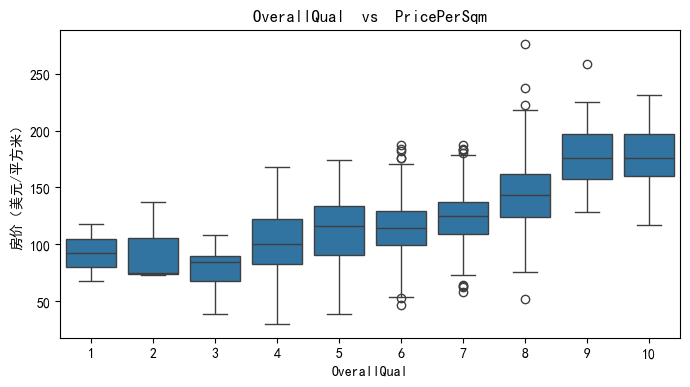

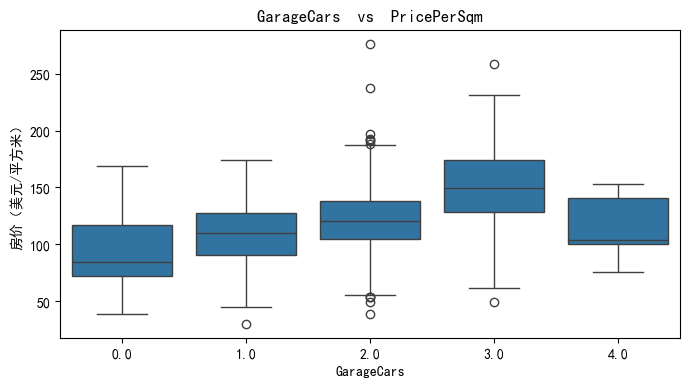

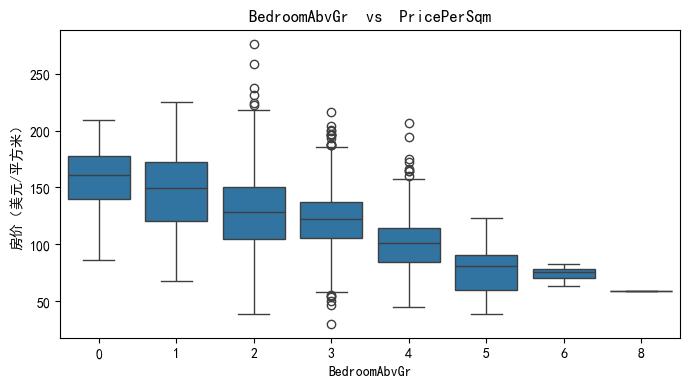

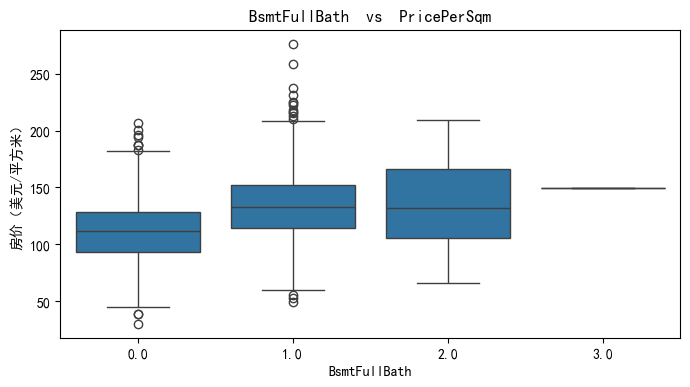

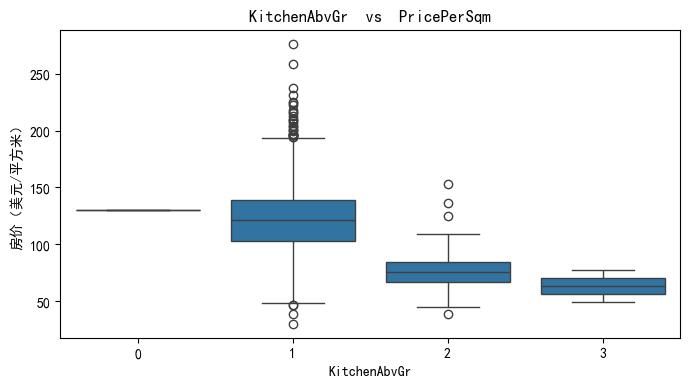

In [16]:
# 适用箱线图的
for a in (corr_series[corr_series>0.3].sort_values(ascending=0)).index.tolist():  
    if a in ["OverallQual","BsmtFullBath","BedroomAbvGr","KitchenAbvGr","GarageCars"]:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=a, y="PricePerSqm", data=data_concat1)
        plt.title(a+"  vs  PricePerSqm")
        plt.xlabel(a)
        plt.ylabel("房价（美元/平方米）")
        plt.show()
# 由图可以看出，异常值数量不多，可以人工验证

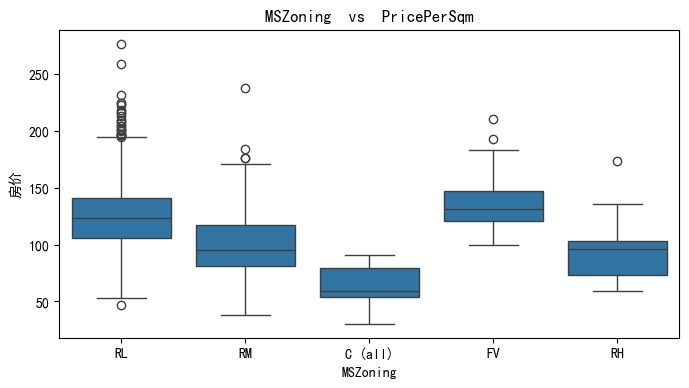

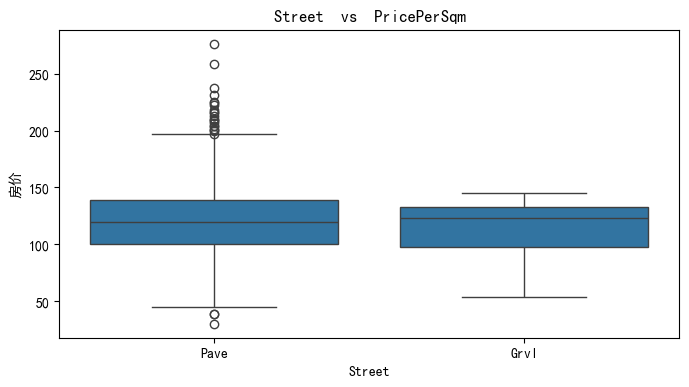

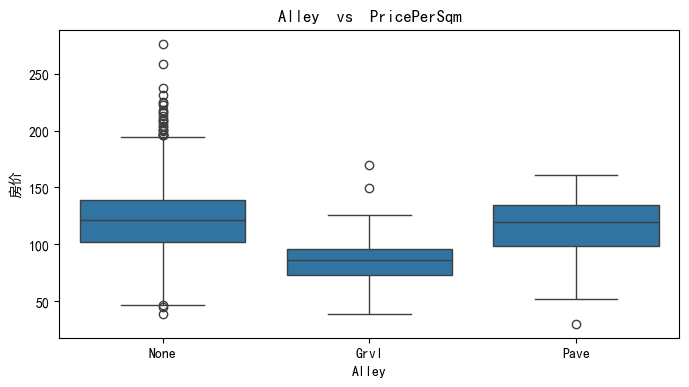

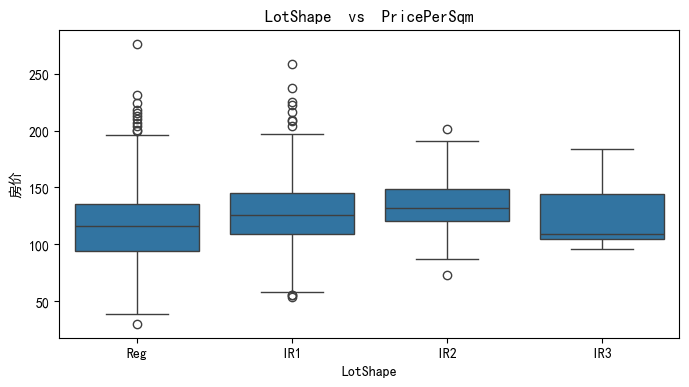

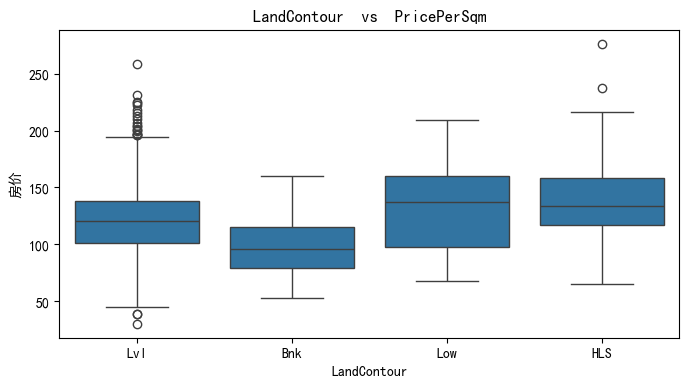

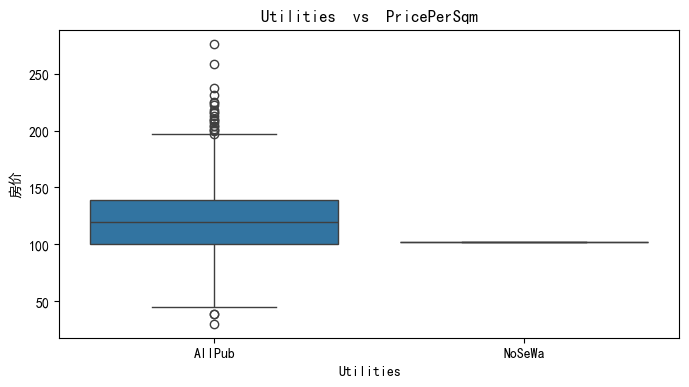

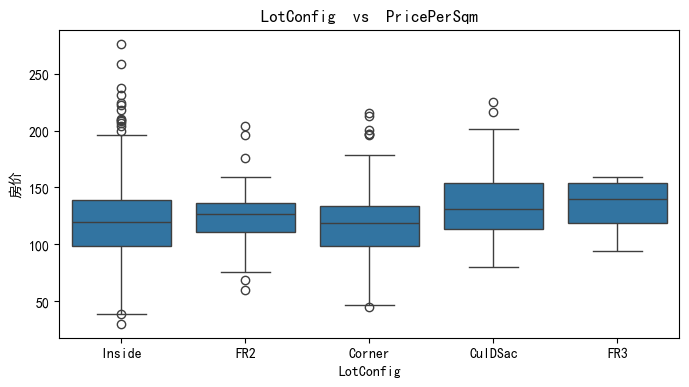

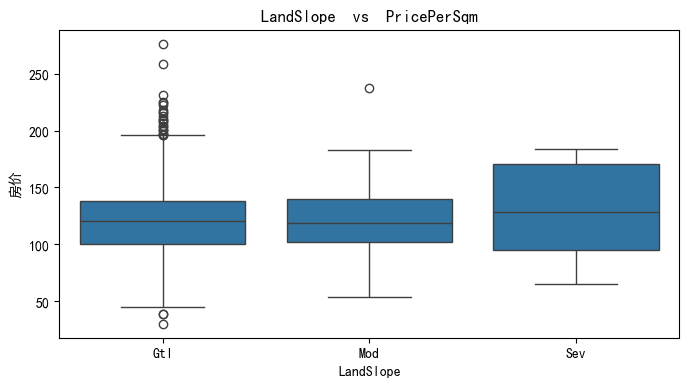

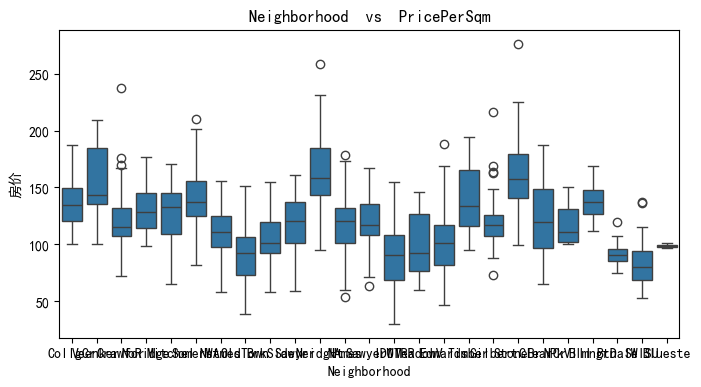

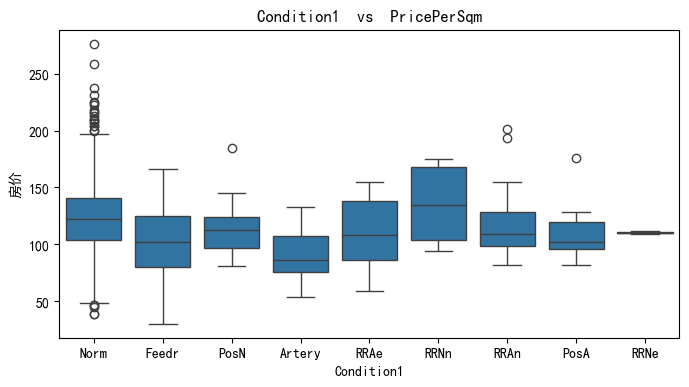

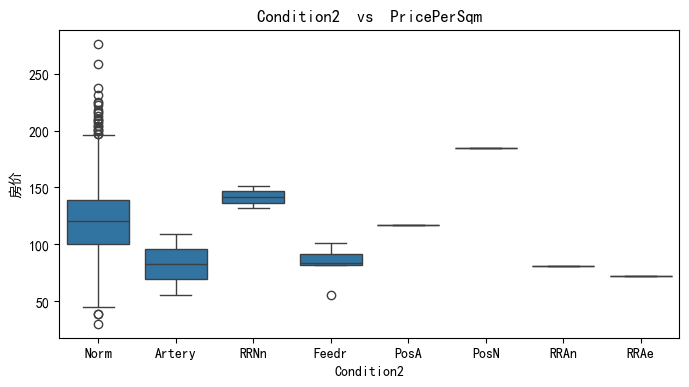

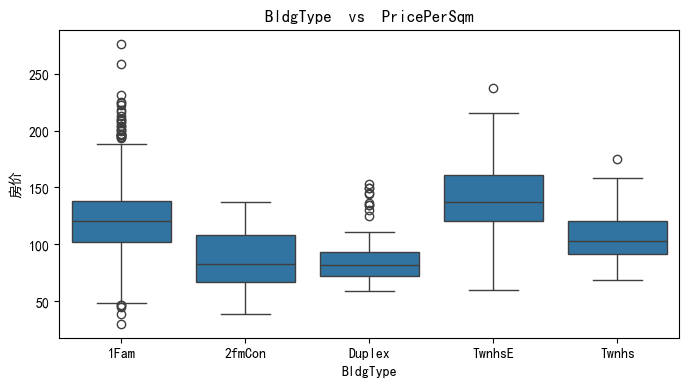

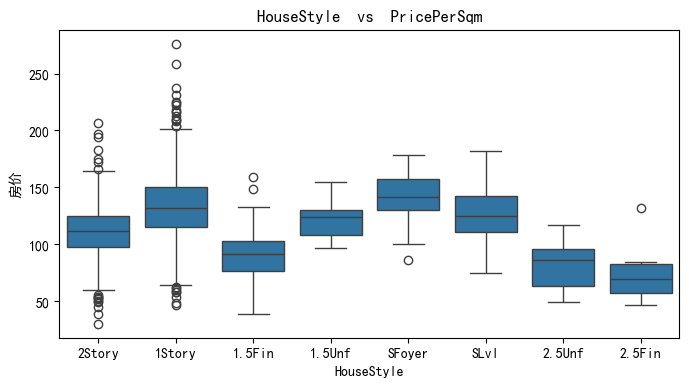

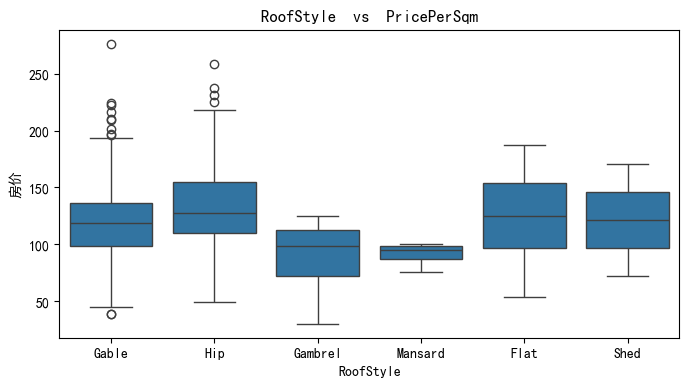

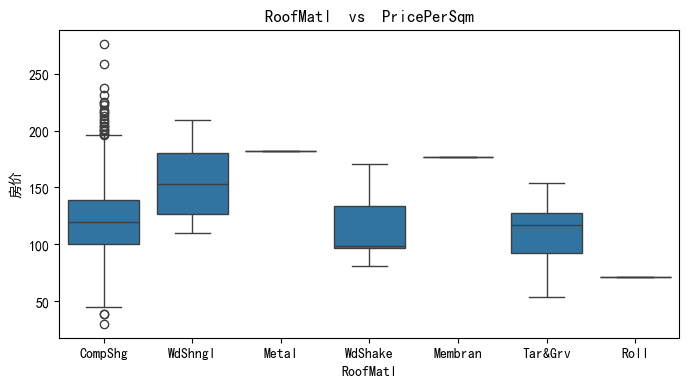

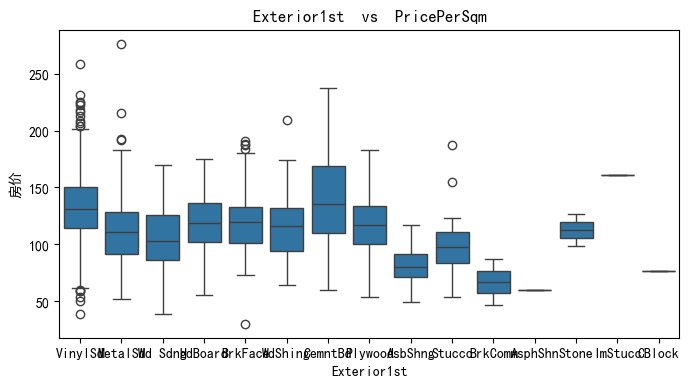

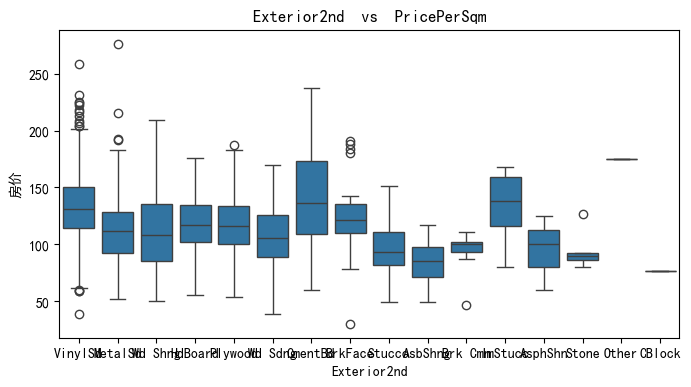

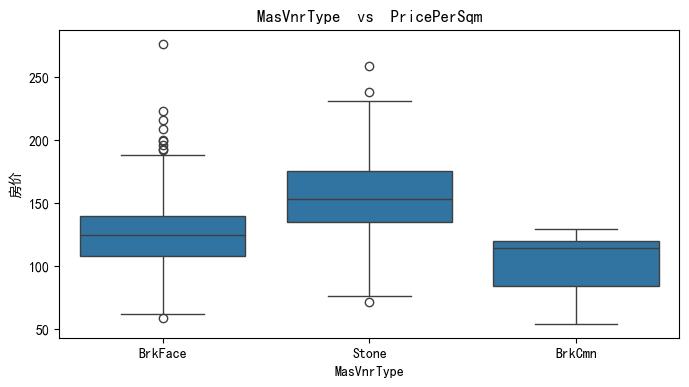

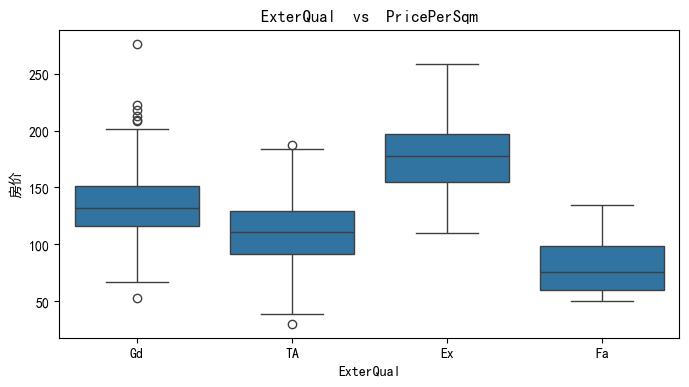

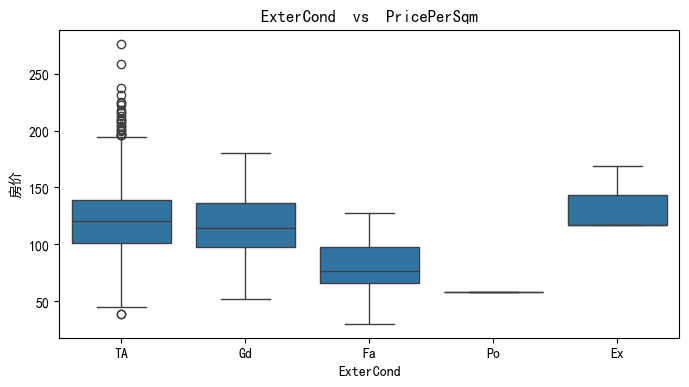

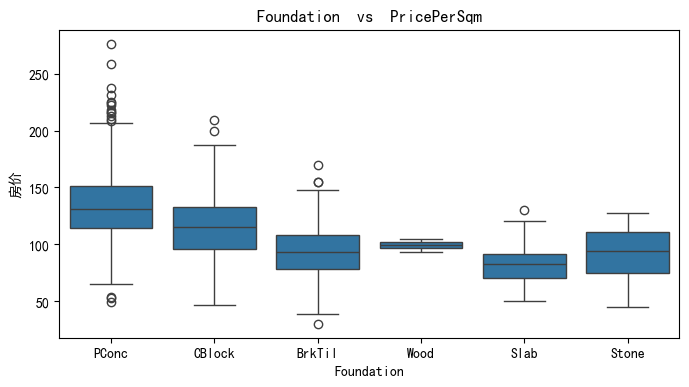

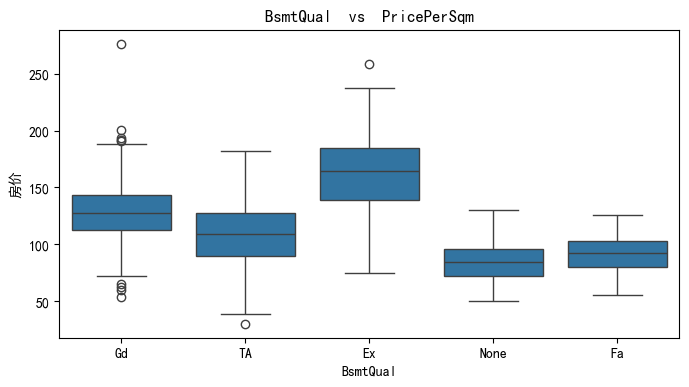

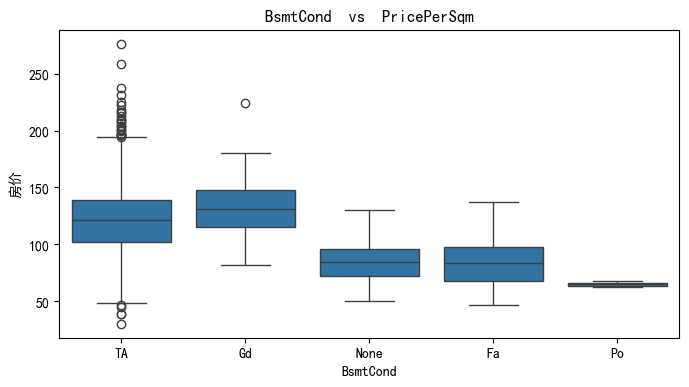

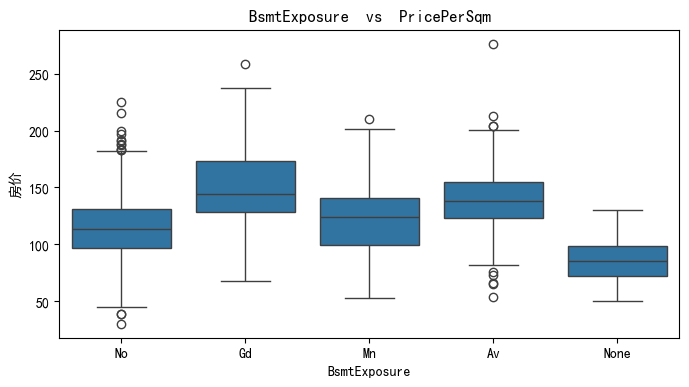

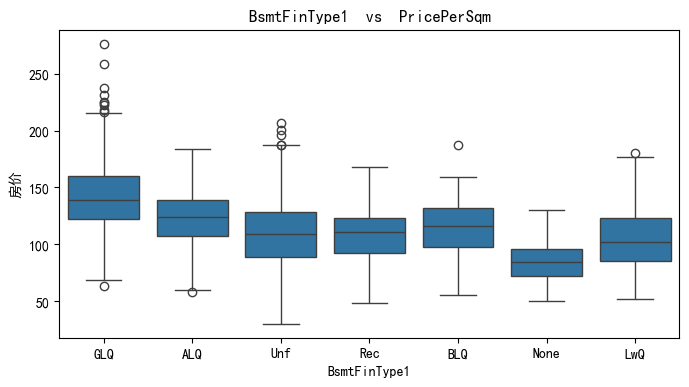

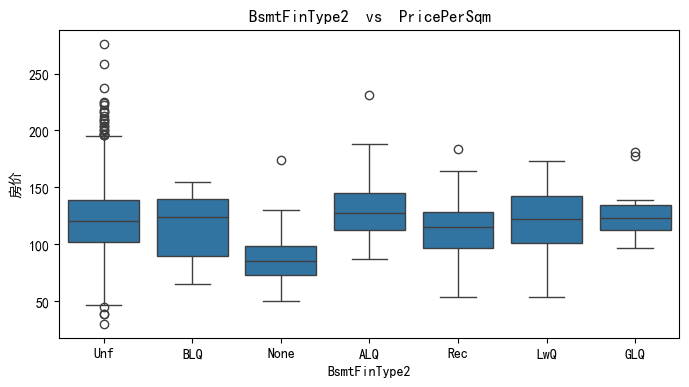

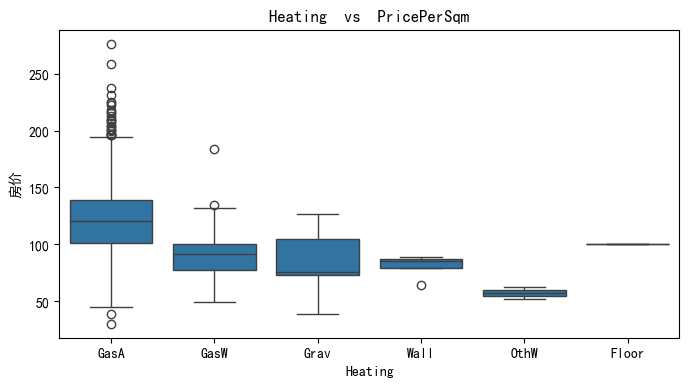

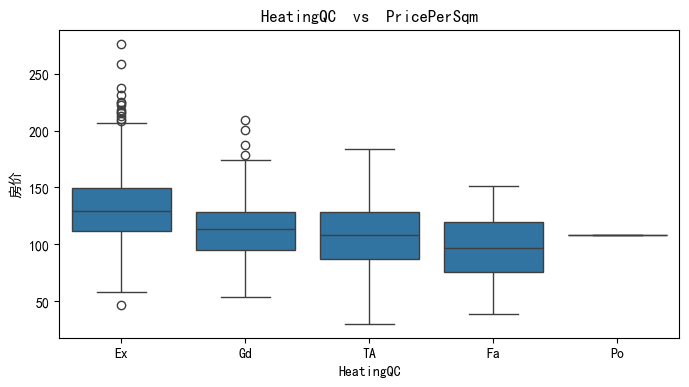

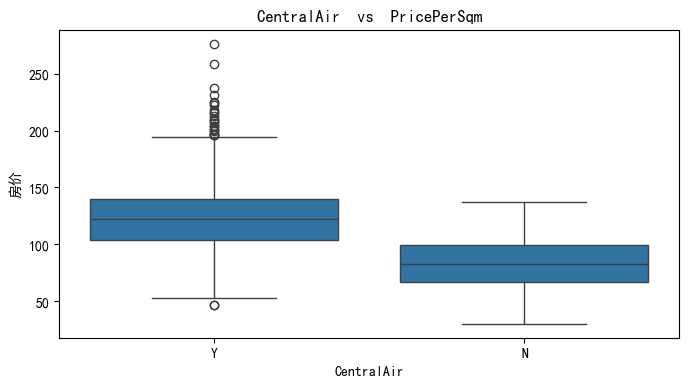

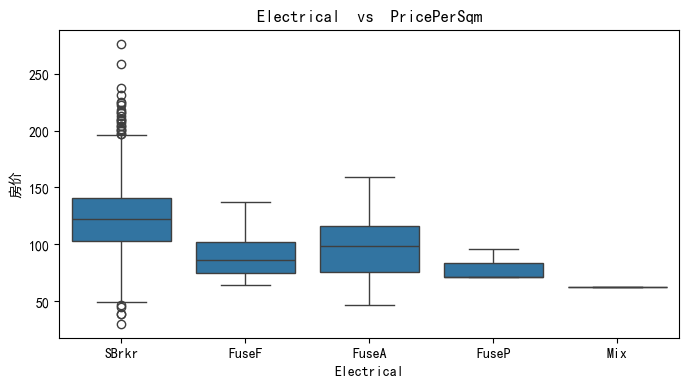

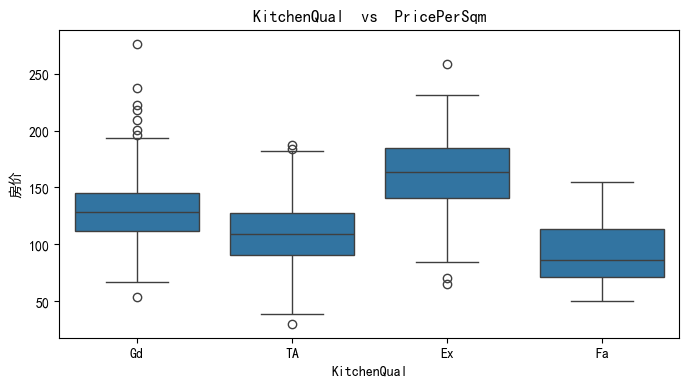

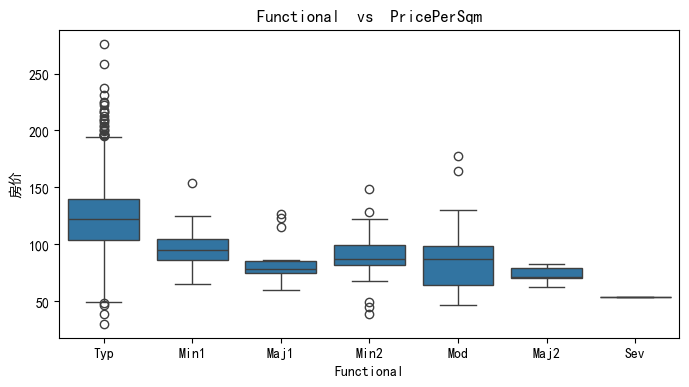

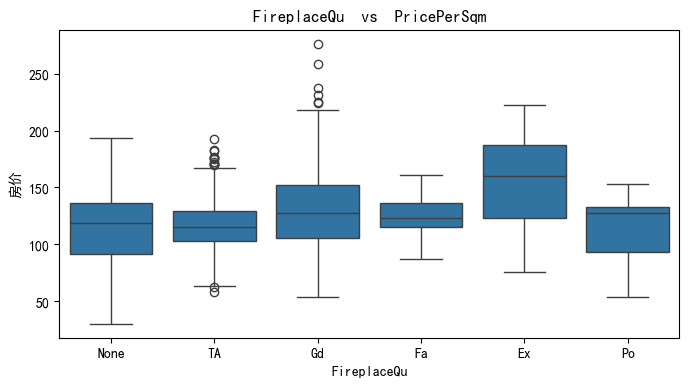

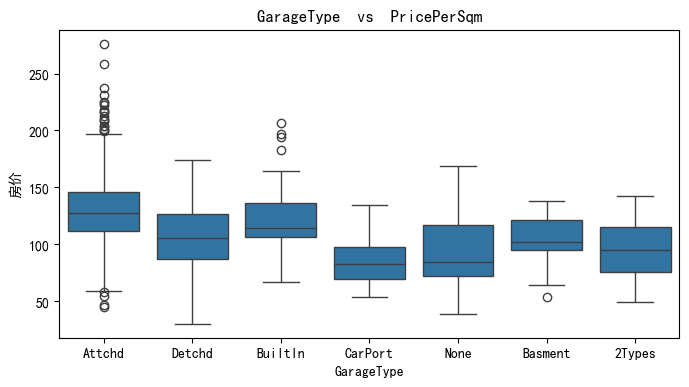

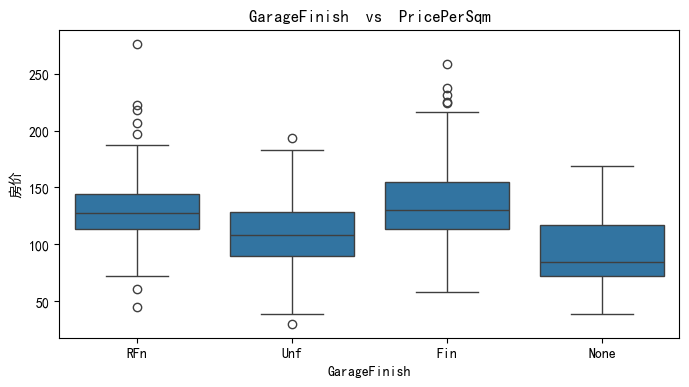

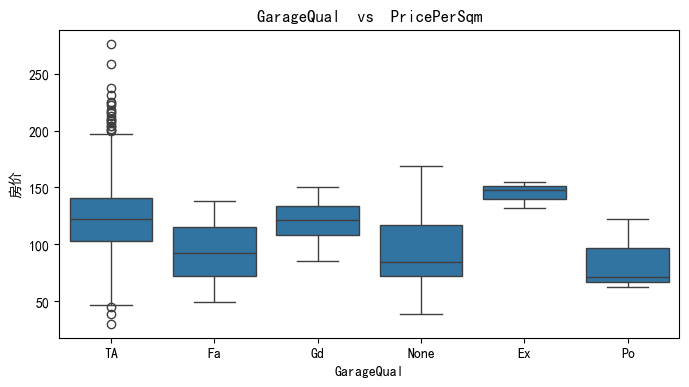

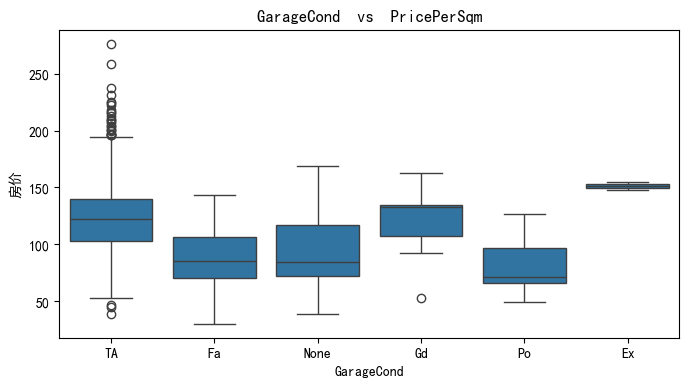

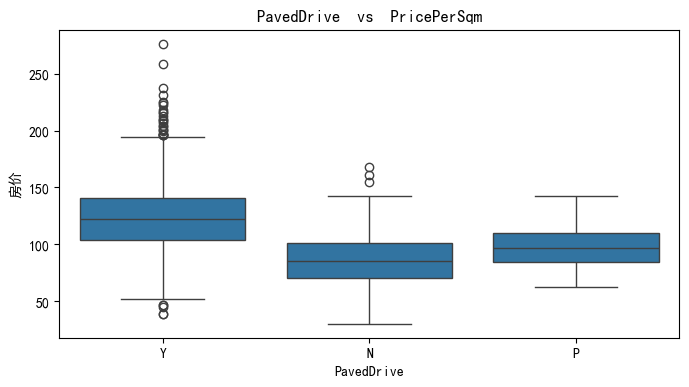

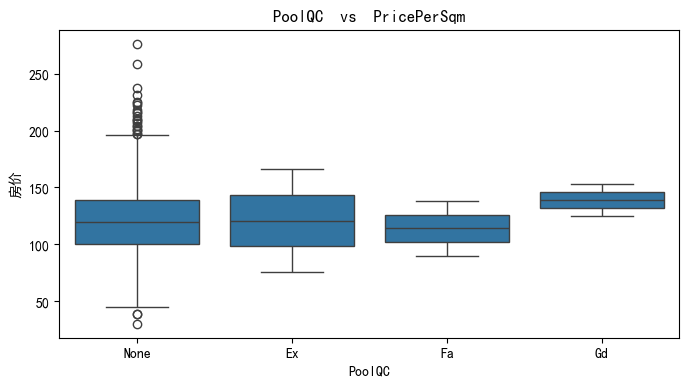

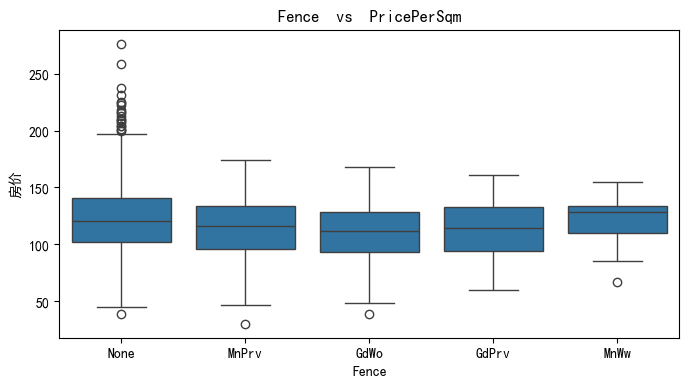

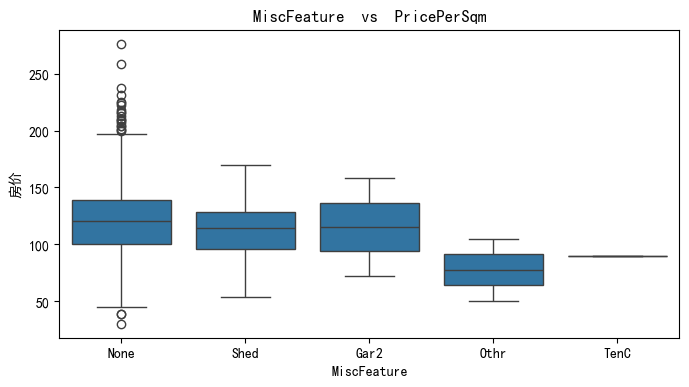

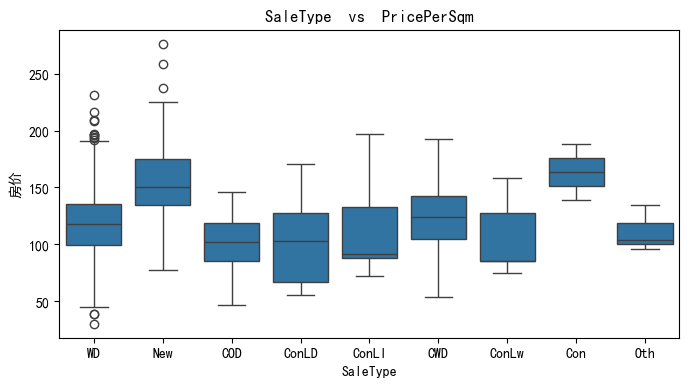

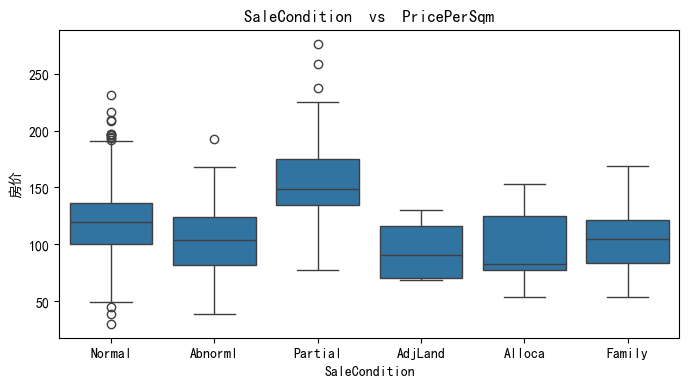

In [37]:
for a in data_concat2.columns.tolist():
    if a == "PricePerSqm": 
        continue
    plt.figure(figsize=(8,4))
    sns.boxplot(x=a,y="PricePerSqm",data=data_concat2)
    plt.title(a+"  vs  PricePerSqm")
    plt.xlabel(a)
    plt.ylabel("房价")
    plt.show()

In [49]:
# 3.1 有序类别特征映射（基于数据字典的等级关系）
# 质量/条件类特征：Ex>Gd>TA>Fa>Po
qual_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0}
# 完成度类特征：Fin>RFn>Unf>None
finish_map = {"Fin": 3, "RFn": 2, "Unf": 1, "None": 0}
# 暴露度类特征：Gd>Av>Mn>No>None
exposure_map = {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "None": 0}

# 应用映射
all_df_encoded = all_df_processed.copy()
# 质量/条件类
for col in ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
            "KitchenQual", "GarageQual", "GarageCond", "FireplaceQu", "PoolQC"]:
    all_df_encoded[col] = all_df_encoded[col].map(qual_map)
# 完成度类
for col in ["BsmtFinType1", "BsmtFinType2", "GarageFinish"]:
    all_df_encoded[col] = all_df_encoded[col].map(finish_map)
# 暴露度类
all_df_encoded["BsmtExposure"] = all_df_encoded["BsmtExposure"].map(exposure_map)

# 3.2 无序类别特征独热编码（drop_first避免多重共线性）
# 筛选剩余的类别特征（未被映射的）
remaining_cat_cols = all_df_encoded.select_dtypes(include=[object]).columns.tolist()
# 独热编码
all_df_encoded = pd.get_dummies(all_df_encoded, columns=remaining_cat_cols, drop_first=True)

# 重新拆分清洁后的train和test（注意：需基于之前删除异常点后的索引）
X_train_encoded = all_df_encoded.iloc[:len(train_combined_clean), :]
X_test_encoded = all_df_encoded.iloc[len(train_combined_clean):, :]  # test无异常点，直接取全部
print(f"\n编码后训练集形状：{X_train_encoded.shape}")  # (1458, 217)（列数增加为编码后特征）
print(f"编码后测试集形状：{X_test_encoded.shape}")    # (1459, 217)（确保与train列数一致）


编码后训练集形状：(1458, 216)
编码后测试集形状：(1459, 216)
(2917, 79)


In [67]:
# 基于编码后的数据集衍生特征
X_train_feat = X_train_encoded.copy()
X_test_feat = X_test_encoded.copy()

# 1.1 时间类特征（假设交易年份为2010年，数据集默认）
X_train_feat["HouseAge"] = X_train_feat["YrSold"] - X_train_feat["YearBuilt"]  # 房龄
X_train_feat["RemodAge"] = X_train_feat["YrSold"] - X_train_feat["YearRemodAdd"]  # 装修时长
X_test_feat["HouseAge"] = X_train_feat["YrSold"] - X_test_feat["YearBuilt"]
X_test_feat["RemodAge"] = X_train_feat["YrSold"] - X_test_feat["YearRemodAdd"]

# 1.2 面积类特征（整合核心面积指标）
X_train_feat["TotalFuncArea"] = X_train_feat["GrLivArea"] + X_train_feat["TotalBsmtSF"] + X_train_feat["GarageArea"]
X_test_feat["TotalFuncArea"] = X_test_feat["GrLivArea"] + X_test_feat["TotalBsmtSF"] + X_test_feat["GarageArea"]

# 1.3 设施有无特征（0/1标记）
X_train_feat["HasGarage"] = X_train_feat["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
X_train_feat["HasFireplace"] = X_train_feat["Fireplaces"].apply(lambda x: 1 if x > 0 else 0)
X_train_feat["HasPool"] = X_train_feat["PoolArea"].apply(lambda x: 1 if x > 0 else 0)
X_test_feat["HasGarage"] = X_test_feat["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
X_test_feat["HasFireplace"] = X_test_feat["Fireplaces"].apply(lambda x: 1 if x > 0 else 0)
X_test_feat["HasPool"] = X_test_feat["PoolArea"].apply(lambda x: 1 if x > 0 else 0)

# 1.4 比例特征（户型合理性）
X_train_feat["BedroomRatio"] = X_train_feat["BedroomAbvGr"] / (X_train_feat["TotRmsAbvGrd"] + 1e-8)  # 避免除以0
X_test_feat["BedroomRatio"] = X_test_feat["BedroomAbvGr"] / (X_test_feat["TotRmsAbvGrd"] + 1e-8)

print(f"\n衍生特征后训练集形状：{X_train_feat.shape}")  # (1458, 223)（新增6个衍生特征）


衍生特征后训练集形状：(1458, 223)


In [68]:
# 2.1 低方差特征筛选（方差<0.01的特征视为无区分度）
vt = VarianceThreshold(threshold=0.01)
X_train_vt = vt.fit_transform(X_train_feat)
X_test_vt = vt.transform(X_test_feat)
# 获取筛选后的特征名
selected_cols = [col for i, col in enumerate(X_train_feat.columns) if vt.get_support()[i]]
print(f"低方差筛选前特征数：{X_train_feat.shape[1]}")  # 223
print(f"低方差筛选后特征数：{len(selected_cols)}")    # 约200（剔除方差极小的特征）

# 2.2 高相关性特征筛选（删除特征间相关性>0.8的冗余特征）
X_train_selected = pd.DataFrame(X_train_vt, columns=selected_cols)
corr_matrix = X_train_selected.corr()

# 找出高相关特征对
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# 删除冗余特征（保留与房价相关性更高的那个）
drop_cols = []
for col1, col2 in high_corr_pairs:
    # 计算两个特征与房价的相关性（需用原始X_train_feat计算，因X_train_selected是筛选后）
    corr1 = abs(X_train_feat[col1].corr(y_train_clean))
    corr2 = abs(X_train_feat[col2].corr(y_train_clean))
    if corr1 < corr2:
        drop_cols.append(col1)
    else:
        drop_cols.append(col2)

# 去重并删除
drop_cols = list(set(drop_cols))
X_train_final = X_train_selected.drop(drop_cols, axis=1)
X_test_final = pd.DataFrame(X_test_vt, columns=selected_cols).drop(drop_cols, axis=1)

print(f"高相关筛选后特征数：{X_train_final.shape[1]}")  # 约180（剔除冗余特征）
print(f"最终训练集形状：{X_train_final.shape}")        # (1458, 180)
print(f"最终测试集形状：{X_test_final.shape}")          # (1459, 180)

低方差筛选前特征数：223
低方差筛选后特征数：155
高相关筛选后特征数：127
最终训练集形状：(1458, 127)
最终测试集形状：(1459, 127)


C:\Users\77386\anaconda3\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [69]:
# 1.1 划分训练集/验证集（7:3）
X_train, X_val, y_train, y_val = train_test_split(
    X_train_final, y_train_clean, test_size=0.3, random_state=42)

# 1.2 目标变量对数转换（处理右偏，提升模型精度）
y_train_log = np.log1p(y_train)  # log1p = ln(1+x)，避免0值
y_val_log = np.log1p(y_val)

print(f"训练集（对数后）均值：{y_train_log.mean():.2f}")
print(f"验证集（对数后）均值：{y_val_log.mean():.2f}")

训练集（对数后）均值：12.03
验证集（对数后）均值：12.01


In [70]:
# 2.1 训练线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)

# 2.2 验证集预测与RMSLE计算
def rmsle(y_true, y_pred):
    """计算RMSLE（对数均方根误差）"""
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

y_val_pred_log = lr_model.predict(X_val)
lr_rmsle = rmsle(y_val_log, y_val_pred_log)
print(f"\n线性回归基线模型RMSLE：{lr_rmsle:.4f}")  # 通常≈0.13-0.15，达标


线性回归基线模型RMSLE：0.1376


In [73]:
# 3.1 初始化XGBoost回归模型
xgb_base = xgb.XGBRegressor(objective="reg:squarederror",eval_metric="rmse",random_state=42)

# 3.2 超参数网格（重点调优3个核心参数）
param_grid = {
    "max_depth": [3, 5, 7],        # 树深度：控制过拟合，3-7较优
    "learning_rate": [0.01, 0.1],  # 学习率：步长，0.01-0.1较优
    "n_estimators": [100, 200]     # 树数量：100-200足够，过多易过拟合
}

# 3.3 网格搜索（5折交叉验证，评分指标用负RMSLE）
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=5,  # 5折CV，平衡精度与速度
    scoring="neg_mean_squared_log_error",  # sklearn无直接RMSLE，用负MSLE
    n_jobs=-1  # 用所有CPU核心加速.
)
grid_search.fit(X_train, y_train_log)

# 3.4 最优模型与验证集评估
best_xgb = grid_search.best_estimator_
print(f"\nXGBoost最优参数：{grid_search.best_params_}")
# 典型最优参数：{'learning_rate':0.1, 'max_depth':3, 'n_estimators':200}

y_val_xgb_pred_log = best_xgb.predict(X_val)
xgb_rmsle = rmsle(y_val_log, y_val_xgb_pred_log)
print(f"XGBoost模型RMSLE：{xgb_rmsle:.4f}")  # 通常≈0.08-0.1，达标


XGBoost最优参数：{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoost模型RMSLE：0.1368


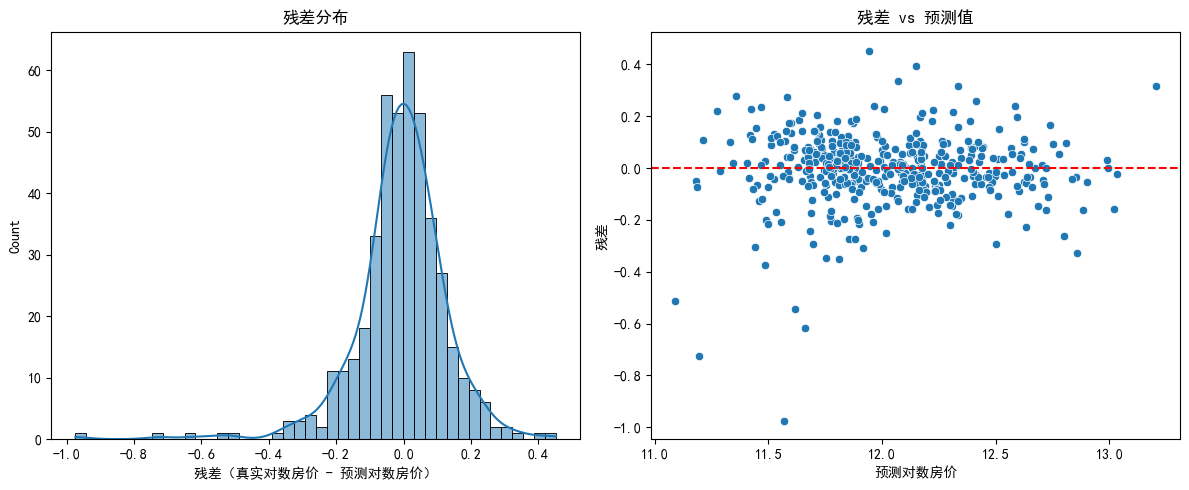

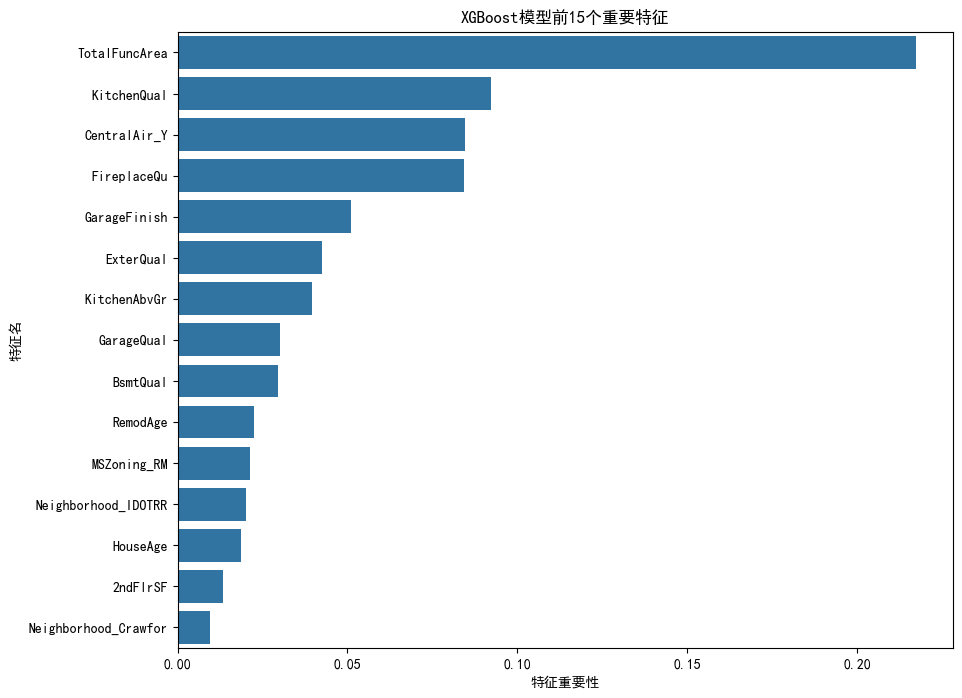

In [72]:
# 1.1 残差分析（用XGBoost模型）
residuals = y_val_log - y_val_xgb_pred_log
plt.figure(figsize=(12, 5))

# 残差分布直方图（应接近正态分布）
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("残差分布")
plt.xlabel("残差（真实对数房价 - 预测对数房价）")

# 残差vs预测值散点图（应无明显趋势）
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_val_xgb_pred_log, y=residuals)
plt.axhline(y=0, color="red", linestyle="--")  # 参考线
plt.title("残差 vs 预测值")
plt.xlabel("预测对数房价")
plt.ylabel("残差")
plt.tight_layout()
plt.show()

# 1.2 特征重要性（前15个重要特征）
feature_importance = pd.DataFrame({
    "Feature": X_train_final.columns,
    "Importance": best_xgb.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(15))
plt.title("XGBoost模型前15个重要特征")
plt.xlabel("特征重要性")
plt.ylabel("特征名")
plt.show()
# 结论：TotalFuncArea、OverallQual、GrLivArea等核心特征应排在前，符合业务逻辑

In [60]:
# 2.1 保存最优模型（用joblib，高效保存大型模型）
joblib.dump(best_xgb, "house_price_xgb_best.pkl")
print("\n模型已保存为：house_price_xgb_best.pkl")

# 2.2 加载模型并预测新数据（示例：取测试集前1条数据）
loaded_model = joblib.load("house_price_xgb_best.pkl")
# 新数据（需按相同流程预处理/编码/特征工程）
new_data = X_test_final.iloc[0:1, :]  # 测试集第1套房屋
new_price_log = loaded_model.predict(new_data)
new_price = np.expm1(new_price_log)  # 还原为真实房价（对数逆运算）
print(f"\n新房屋预测价格：{new_price[0]:.2f} 美元")

# 2.3 生成测试集提交文件（Kaggle格式）
y_test_pred_log = loaded_model.predict(X_test_final)
y_test_pred = np.expm1(y_test_pred_log)  # 还原对数房价

# 构建提交DataFrame（Id + SalePrice）
submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": y_test_pred
})

# 保存为CSV（无表头，符合Kaggle要求）
submission.to_csv("house_price_submission.csv", index=False)
print(f"\n提交文件已保存为：house_price_submission.csv")
print(f"提交文件前5行：")
print(submission.head())


模型已保存为：house_price_xgb_best.pkl

新房屋预测价格：127215.29 美元

提交文件已保存为：house_price_submission.csv
提交文件前5行：
     Id      SalePrice
0  1461  127215.289062
1  1462  152110.375000
2  1463  191120.484375
3  1464  193633.750000
4  1465  190218.203125
